# DMSL Project - Group 22

## Understanding the state Mental Health for Tech Jobs

In [ ]:
# https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

#install packages

install.packages('gridExtra')
install.packages('mice')
install.packages('scales')
install.packages('caret')
install.packages('vcd')
install.packages('pander')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('viridis')
install.packages("randomForest")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("tidyr")
install.packages("gbm")

#install.packages('ggpubr')
#install.packages('radiant')




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing

In [ ]:
##load libraries

library(tidyverse)
library(ggplot2)
#library(dplyr)
library(scales)
library(gridExtra)
library(caret)
#library(ggplot)
library(mice)
library(viridis)
library(tidyr)
library(forcats)
library(vcd)
library(knitr)
library(pander)
library(rpart)
library(rpart.plot)
library(randomForest)
library(gbm)
library(class)
#library(ggpubr)
#library(radiant)



Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following 

In [ ]:
df <- read.csv("survey.csv")
head(df, n=5)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,⋯,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2014-08-27 11:29:31,37,Female,United States,IL,NA,No,Yes,Often,6-25,⋯,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
2,2014-08-27 11:29:37,44,M,United States,IN,NA,No,No,Rarely,More than 1000,⋯,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
3,2014-08-27 11:29:44,32,Male,Canada,NA,NA,No,No,Rarely,6-25,⋯,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
4,2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,⋯,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
5,2014-08-27 11:30:22,31,Male,United States,TX,NA,No,No,Never,100-500,⋯,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA


In [ ]:
#number of rows and columns
dim(df)

[1] 1259   27

## Preprocessing of Data

In [ ]:
#Check the structure of the data
str(df)

'data.frame':	1259 obs. of  27 variables:
 $ Timestamp                : chr  "2014-08-27 11:29:31" "2014-08-27 11:29:37" "2014-08-27 11:29:44" "2014-08-27 11:29:46" ...
 $ Age                      : num  37 44 32 31 31 33 35 39 42 23 ...
 $ Gender                   : chr  "Female" "M" "Male" "Male" ...
 $ Country                  : chr  "United States" "United States" "Canada" "United Kingdom" ...
 $ state                    : chr  "IL" "IN" NA NA ...
 $ self_employed            : chr  NA NA NA NA ...
 $ family_history           : chr  "No" "No" "No" "Yes" ...
 $ treatment                : chr  "Yes" "No" "No" "Yes" ...
 $ work_interfere           : chr  "Often" "Rarely" "Rarely" "Often" ...
 $ no_employees             : chr  "6-25" "More than 1000" "6-25" "26-100" ...
 $ remote_work              : chr  "No" "No" "No" "No" ...
 $ tech_company             : chr  "Yes" "No" "Yes" "Yes" ...
 $ benefits                 : chr  "Yes" "Don't know" "No" "No" ...
 $ care_options             : c

In [ ]:
#drop irrelevant columns

drop <- c("comments","Timestamp")
df = df[,!(names(df) %in% drop)]
#tail(df,5)

In [ ]:

#v1..Clean up some columns

m <- c("Males", "M", "male", "m", "Male-ish", "maile", "something kinda male?", "Cis Male", "Mal","Male (CIS)", "Make", "Guy (-ish) ^_^", "Male ", "Man", "msle", "Mail", "cis male", "Malr", "Cis Man", "ostensibly male, unsure what that really means")
f <- c("F", "female","f", "Cis Female", "Trans-female", "Woman", "Femake", "woman", "Female ", "cis-female/femme", "Female (trans)", "Female (cis)", "femail", "Trans woman")
o <- c("queer/she/they", "non-binary", "Nah", "All", "Enby", "fluid", "Genderqueer", "Androgyne", "Agender", "male leaning androgynous", "Neuter", "queer", "A little about you", "p")
df$Gender <- ifelse(df$Gender %in% m, "Male", 
                    ifelse(df$Gender %in% f, "Female",
                    ifelse(df$Gender %in% o, "Other", df$Gender)))
#categories <- unique(df$Gender) 

df$Country <- gsub("United States of America", "United States", df$Country)

df$work_interfere <- ifelse(df$work_interfere == "NA", NA, df$work_interfere)
df$wellness_program <- gsub("Don't know", NA,df$wellness_program)
df$care_options <- gsub("Not sure", NA, df$care_options)
df$self_employed <- gsub("Not sure", NA, df$care_options)
df$seek_help <- gsub("Don't know", NA, df$seek_help)
df$anonymity <- gsub("Don't know", NA, df$anonymity)
df$leave <- gsub("Don't know", NA, df$leave)
df$mental_vs_physical <- gsub("Don't know", NA, df$mental_vs_physical)
#df$comments <- ifelse(df$comments == "", NA, df$comments)

df$Age <- abs(df$Age)
df$Age <- ifelse(df$Age < 18 | df$Age > 99, NA, df$Age )





In [ ]:
# Count the number of missing values in each column
missing_values <- colSums(is.na(df))

# Create a table with the column names and missing value counts
table <- data.frame(Column = names(missing_values), Missing_Values = missing_values)


# Print the table
print(table[order(table$Missing_Values, decreasing=TRUE),])


                                             Column Missing_Values
anonymity                                 anonymity            819
mental_vs_physical               mental_vs_physical            576
leave                                         leave            563
state                                         state            515
seek_help                                 seek_help            363
self_employed                         self_employed            314
care_options                           care_options            314
work_interfere                       work_interfere            264
wellness_program                   wellness_program            188
Age                                             Age              7
Gender                                       Gender              0
Country                                     Country              0
family_history                       family_history              0
treatment                                 treatment           

In [ ]:
#Check the summary statistics of the data
#summary(df)

#Check the distribution of the response variable "treatment"
table(df$treatment)

# Remove unnecessary columns
#df$Timestamp <- NULL
#df$comments <- NULL


# Recode categorical variables as factors
df$Gender <- factor(df$Gender)
df$Country <- factor(df$Country)
df$state <- factor(df$state)
df$self_employed <- factor(df$self_employed)
df$family_history <- factor(df$family_history)
df$treatment <- factor(df$treatment)
df$work_interfere <- factor(df$work_interfere)
df$no_employees <- factor(df$no_employees)
df$remote_work <- factor(df$remote_work)
df$tech_company <- factor(df$tech_company)
df$benefits <- factor(df$benefits)
df$care_options <- factor(df$care_options)
df$wellness_program <- factor(df$wellness_program)
df$seek_help <- factor(df$seek_help)
df$anonymity <- factor(df$anonymity)
df$leave <- factor(df$leave)
df$mental_health_consequence <- factor(df$mental_health_consequence)
df$phys_health_consequence <- factor(df$phys_health_consequence)
df$coworkers <- factor(df$coworkers)
df$supervisor <- factor(df$supervisor)
df$mental_health_interview <- factor(df$mental_health_interview)
df$phys_health_interview <- factor(df$phys_health_interview)
df$mental_vs_physical <- factor(df$mental_vs_physical)
df$obs_consequence <- factor(df$obs_consequence)



 No Yes 
622 637 

In [ ]:
#columns with missing values..all seems to be categorical except Age

colnames(df)[colSums(is.na(df)) > 0] 


[1] "Age"                "state"              "self_employed"     
 [4] "work_interfere"     "care_options"       "wellness_program"  
 [7] "seek_help"          "anonymity"          "leave"             
[10] "mental_vs_physical"

In [ ]:
#columns with no missing values 

colnames(df) [colSums(is.na(df)) == 0] 


[1] "Gender"                    "Country"                  
 [3] "family_history"            "treatment"                
 [5] "no_employees"              "remote_work"              
 [7] "tech_company"              "benefits"                 
 [9] "mental_health_consequence" "phys_health_consequence"  
[11] "coworkers"                 "supervisor"               
[13] "mental_health_interview"   "phys_health_interview"    
[15] "obs_consequence"

In [ ]:

##impute missing categorical values..reference article: https://datascienceplus.com/handling-missing-data-with-mice-package-a-simple-approach/

init = mice(df, maxit=0) 
cat_methods = init$method
predM = init$predictorMatrix #change predictor vars into matrix
#print(class(predM))


Warning message:
“Number of logged events: 1”


In [ ]:

##takes a while to run......runs but with a warning sign "algorithm did not converge" due to presence of predictor variables that perfectly predicts the predicted variable in the glm model () due to presence of binary vars. 
#can be ignored.
#https://www.programmingr.com/fixing-the-r-warning-message-glm-fit-algorithm-did-not-converge/
  

#skip variables from imputation  
cat_methods[c('Gender','Country','family_history','treatment','no_employees','remote_work','tech_company','benefits','mental_health_consequence','phys_health_consequence','coworkers',
'supervisor','mental_health_interview','phys_health_interview','obs_consequence','state')]=""

#specify the methods for imputing the missing values. logreg for factor level exactly 2, polyreg for factor level >2, norm for age
cat_methods[c('self_employed','care_options','wellness_program','seek_help','anonymity','mental_vs_physical')] = "logreg"
cat_methods[c('state','work_interfere','leave')] = "polyreg"
cat_methods[c('Age')] = "norm"


mice_object <- mice(df, method = cat_methods,  predictorMatrix=predM, m = 5,seed=1234,nnet.MaxNWts = 2500) #The MaxNWts argument to nnet is there to prevent running code that will take a very long time to complete (re:some factor vars have multiple levels



 iter imp variable
  1   1  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  1   2  Age  state  self_employed  work_interfere  care_options  wellness_program  seek_help  anonymity

Warning message:
“glm.fit: algorithm did not converge”


  leave  mental_vs_physical
  1   3  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  1   4  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity

Warning message:
“glm.fit: algorithm did not converge”


  leave  mental_vs_physical
  1   5  Age  state  self_employed  work_interfere  care_options  wellness_program  seek_help  anonymity  leave  mental_vs_physical
  2   1  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  2   2  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  2   3  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  2   4  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  2   5  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity

Warning message:
“glm.fit: algorithm did not converge”


  leave  mental_vs_physical
  3   1  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  3   2  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  3   3  Age  state  self_employed  work_interfere  care_options  wellness_program  seek_help  anonymity  leave  mental_vs_physical
  3   4  Age  state  self_employed  work_interfere  care_options  wellness_program  seek_help  anonymity  leave  mental_vs_physical
  3   5  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  4   1  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity

Warning message:
“glm.fit: algorithm did not converge”


  leave  mental_vs_physical

Warning message:
“glm.fit: algorithm did not converge”



  4   2  Age  state  self_employed  work_interfere  care_options  wellness_program  seek_help  anonymity  leave  mental_vs_physical
  4   3  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  4   4  Age  state  self_employed  work_interfere  care_options  wellness_program  seek_help  anonymity  leave  mental_vs_physical
  4   5  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  5   1  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity

Warning message:
“glm.fit: algorithm did not converge”


  leave  mental_vs_physical
  5   2  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  5   3  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity

Warning message:
“glm.fit: algorithm did not converge”


  leave  mental_vs_physical
  5   4  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical
  5   5  Age  state  self_employed  work_interfere  care_options  wellness_program

Warning message:
“glm.fit: algorithm did not converge”


  seek_help  anonymity  leave  mental_vs_physical


Warning message:
“Number of logged events: 225”


In [ ]:
#Create a dataset after imputation.
imputed_df <- complete(mice_object)


In [ ]:
# Count the number of missing values in each column
missing_values <- colSums(is.na(imputed_df))

# Create a table with the column names and missing value counts
table <- data.frame(Column = names(missing_values), Missing_Values = missing_values)


print(table)

                                             Column Missing_Values
Age                                             Age              0
Gender                                       Gender              0
Country                                     Country              0
state                                         state              0
self_employed                         self_employed              0
family_history                       family_history              0
treatment                                 treatment              0
work_interfere                       work_interfere              0
no_employees                           no_employees              0
remote_work                             remote_work              0
tech_company                           tech_company              0
benefits                                   benefits              0
care_options                           care_options              0
wellness_program                   wellness_program           

In [ ]:
###check accuracy of imputed data using two vars below as proxy..distribution of non-missing data look similar 

# work_interfere
actual <- df$work_interfere[is.na(df$work_interfere)==0]
predicted <- imputed_df$work_interfere[is.na(imputed_df$work_interfere)==0]

# seek_help
# actual <- df$seek_help[is.na(df$seek_help)==0]
# predicted <- imputed_df$seek_help[is.na(imputed_df$seek_help)==0]

table(actual)
table(predicted)


actual
    Never     Often    Rarely Sometimes 
      213       144       173       465 

predicted
    Never     Often    Rarely Sometimes 
      351       160       209       539 

In [ ]:

# replace missing values in df with imputed values
df[is.na(df)] <- imputed_df[is.na(df)]


In [ ]:
# check Age after imputation
df$Age <- as.integer(df$Age)
unique(df$Age)

[1] 37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22 19
[26] 25 45 21 43 56 60 54 55 49 48 20 57 58 47 62 51 65 53 61 72

In [ ]:
#dummy variables

#age groupings

df <- df %>% 
  mutate(
    # Create categories
    age_group = dplyr::case_when(
      Age >= 18 &  Age <= 30 ~ "YoungAdult",
       Age >= 31 &  Age <= 45 ~ "MiddleAgedAdult",
       Age > 45             ~ "OldAdults"
    ),
    # Convert to factor
    age_group = factor(
      age_group,
      level = c("YoungAdult", "MiddleAgedAdult","OldAdults")
    )
  )


In [ ]:
#Check the structure of the data
str(df)

'data.frame':	1259 obs. of  26 variables:
 $ Age                      : int  37 44 32 31 31 33 35 39 42 23 ...
 $ Gender                   : Factor w/ 3 levels "Female","Male",..: 1 2 2 2 2 2 1 2 1 2 ...
 $ Country                  : Factor w/ 48 levels "Australia","Austria",..: 46 46 8 45 46 46 46 8 46 8 ...
 $ state                    : Factor w/ 45 levels "AL","AZ","CA",..: 11 12 21 2 38 37 19 4 11 16 ...
 $ self_employed            : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 1 2 2 1 ...
 $ family_history           : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 1 2 1 ...
 $ treatment                : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 1 2 1 2 1 ...
 $ work_interfere           : Factor w/ 4 levels "Never","Often",..: 2 3 3 2 1 4 4 1 4 1 ...
 $ no_employees             : Factor w/ 6 levels "1-5","100-500",..: 5 6 5 3 2 5 1 1 2 3 ...
 $ remote_work              : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 2 2 1 1 ...
 $ tech_company             : Factor w/ 2 levels "No","Yes": 2

In [ ]:
#Bucketing related variables for displaying EDA. Report writing will be organized too. 

#1. Demographic: age, gender, family_history, state, country, self-employed 
#2. Company characteristics: no_employees, remote_work,  tech_company
#3. Company's mental health services: benefits, care_options, wellness_program, seek_help, anonymity, leave
#4. Employees' behaviorial characteristics: coworkers, supervisor, mental_health_interview, phys_health_interview, work_interfere, mental_health_consequence, phys_health_consequence, mental_vs_physical (last 3 are employees perceptions)

# Exploratory Data Analysis - Demographic

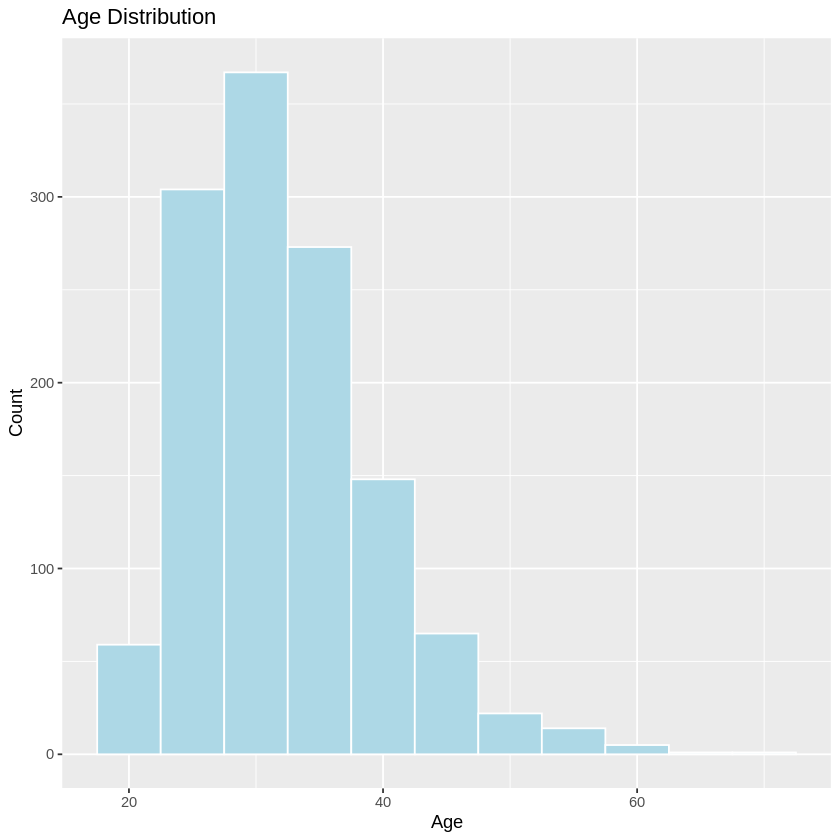

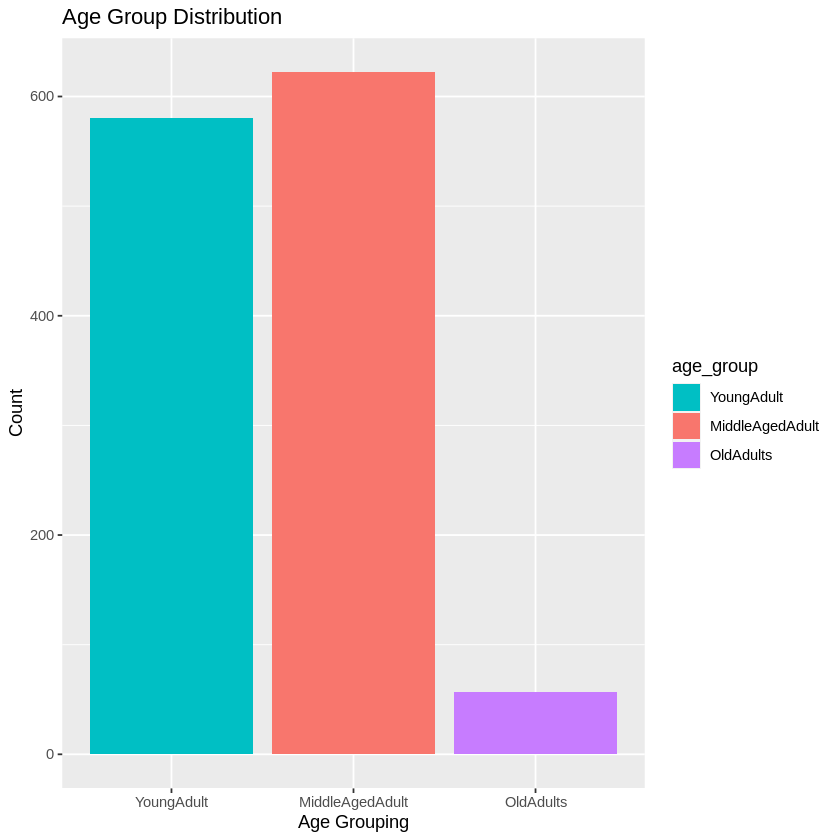

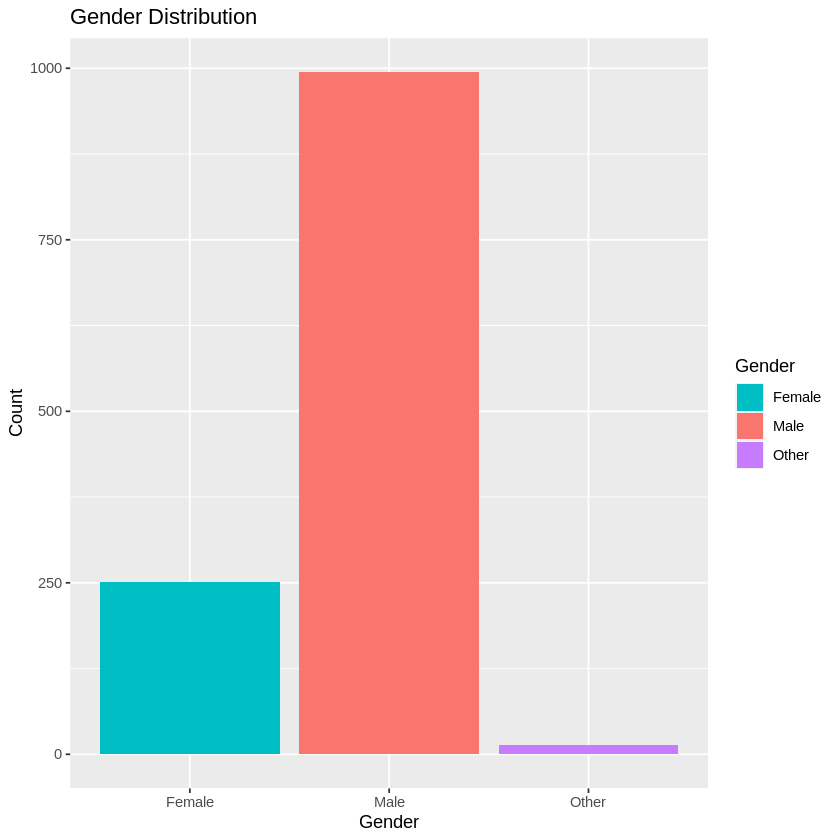

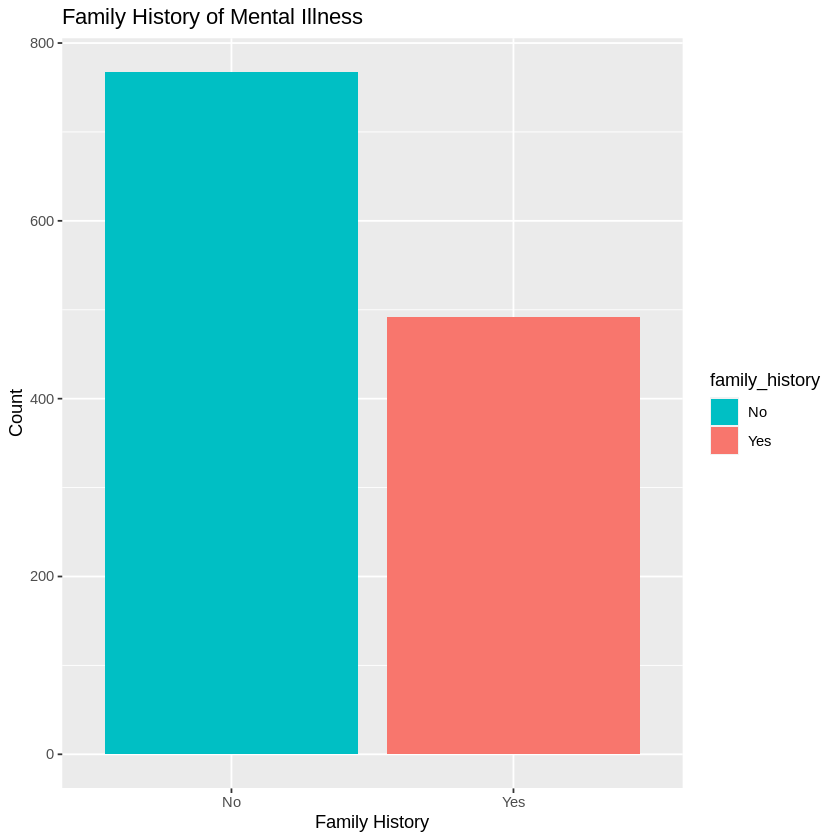

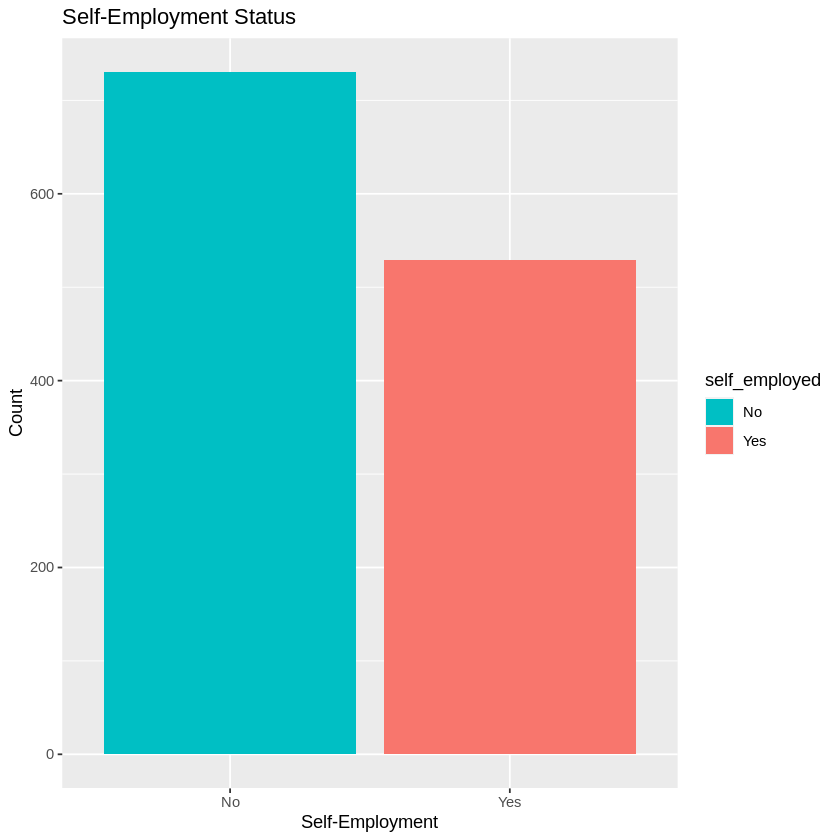

In [ ]:
#1. Demographic: age, gender, family_history, state, country, self-employed 


par(mfrow=c(2,2))

# summary statistics for numerical variables
#summary(df$age_group)

# histogram of age distribution
ggplot(df, aes(x=Age)) +
  geom_histogram(binwidth=5, fill="lightblue", color="white") +
  labs(title="Age Distribution", x="Age", y="Count")


# bar plot of age group
ggplot(df, aes(x=age_group, fill=age_group)) +
  geom_bar() +
  labs(title="Age Group Distribution", x="Age Grouping", y="Count") +
  scale_fill_manual(values=c("#00BFC4", "#F8766D", "#C77CFF"))

# bar plot of gender distribution
ggplot(df, aes(x=Gender, fill=Gender)) +
  geom_bar() +
  labs(title="Gender Distribution", x="Gender", y="Count") +
  scale_fill_manual(values=c("#00BFC4", "#F8766D", "#C77CFF"))

# bar plot of family history
ggplot(df, aes(x=family_history, fill=family_history)) +
  geom_bar() +
  labs(title="Family History of Mental Illness", x="Family History", y="Count") +
  scale_fill_manual(values=c("#00BFC4", "#F8766D"))

# bar plot of self-employment status
ggplot(df, aes(x=self_employed, fill=self_employed)) +
  geom_bar() +
  labs(title="Self-Employment Status", x="Self-Employment", y="Count") +
  scale_fill_manual(values=c("#00BFC4", "#F8766D"))


# Exploratory Data Analysis - Company characteristics


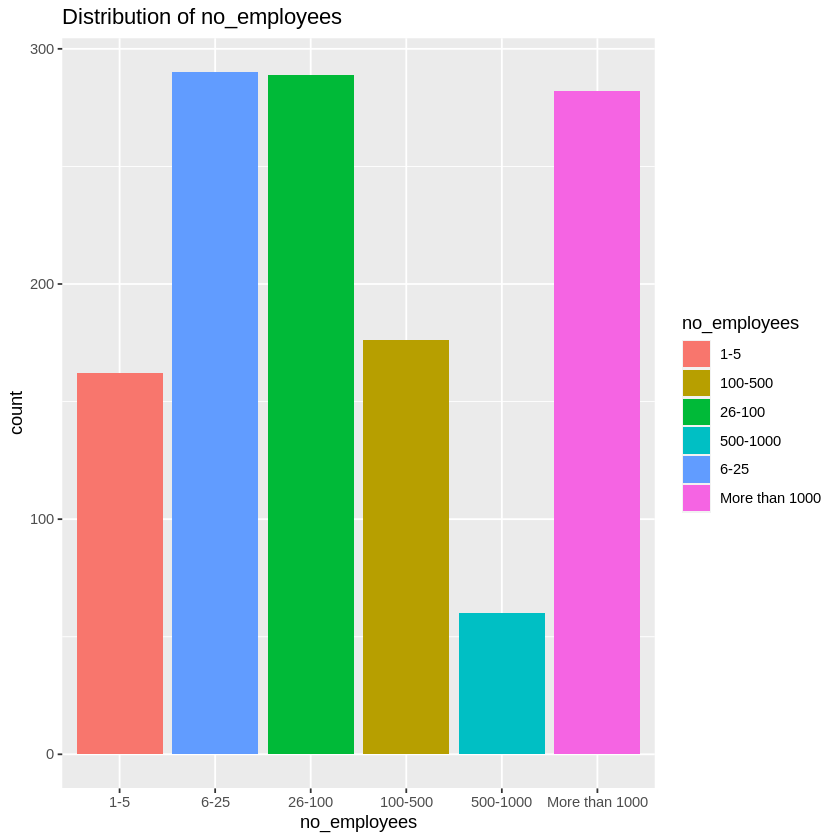

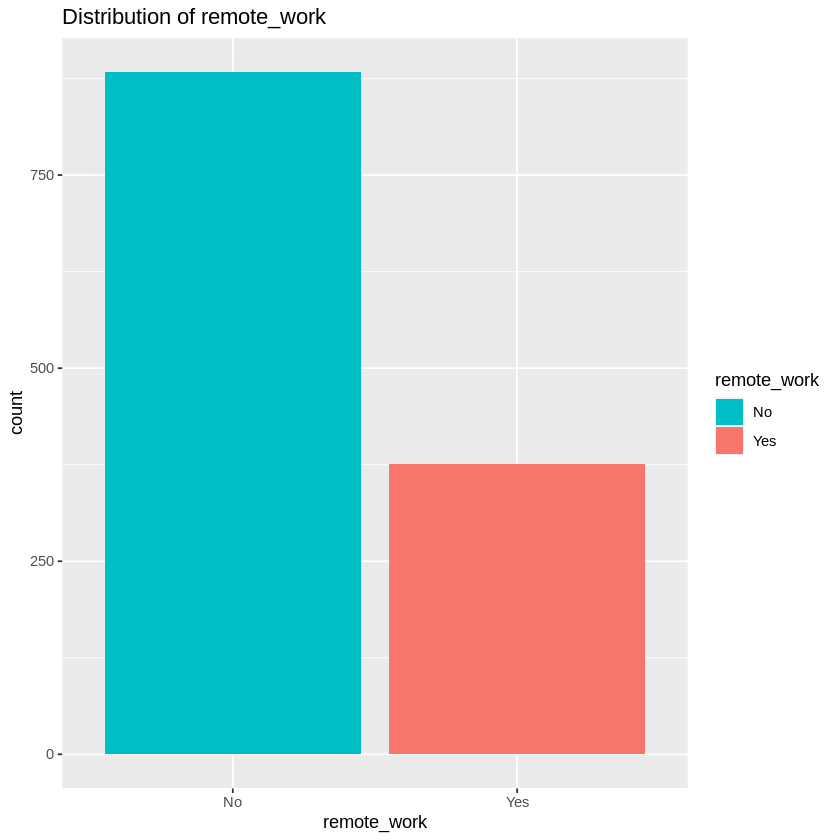

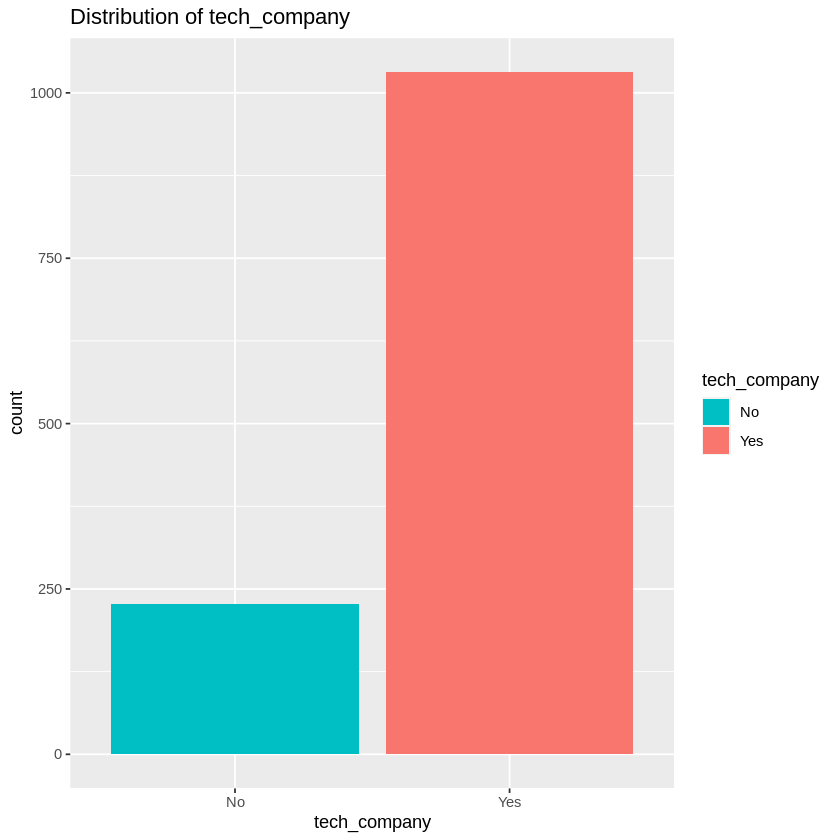

In [ ]:
#2. Company characteristics: no_employees, remote_work,  tech_company

# Explore the no_employees variable
df %>% 
  group_by(no_employees) %>% 
  summarise(count=n()) %>% 
  ggplot(aes(x=factor(no_employees,level=c('1-5', '6-25', '26-100','100-500','500-1000','More than 1000')), y=count, fill=no_employees)) + 
  geom_bar(stat="identity") + 
  ggtitle("Distribution of no_employees") + xlab("no_employees")

# Explore the remote_work variable
df %>% 
  group_by(remote_work) %>% 
  summarise(count=n()) %>% 
  ggplot(aes(x=remote_work, y=count, fill=remote_work)) + 
  geom_bar(stat="identity") + 
  ggtitle("Distribution of remote_work")+
  scale_fill_manual(values=c("#00BFC4", "#F8766D"))

# Explore the tech_company variable
df %>% 
  group_by(tech_company) %>% 
  summarise(count=n()) %>% 
  ggplot(aes(x=tech_company, y=count, fill=tech_company)) + 
  geom_bar(stat="identity") + 
  ggtitle("Distribution of tech_company")+
  scale_fill_manual(values=c("#00BFC4", "#F8766D"))



# Exploratory Data Analysis - Company's mental health services

`summarise()` has grouped output by 'key'. You can override using the `.groups`
argument.


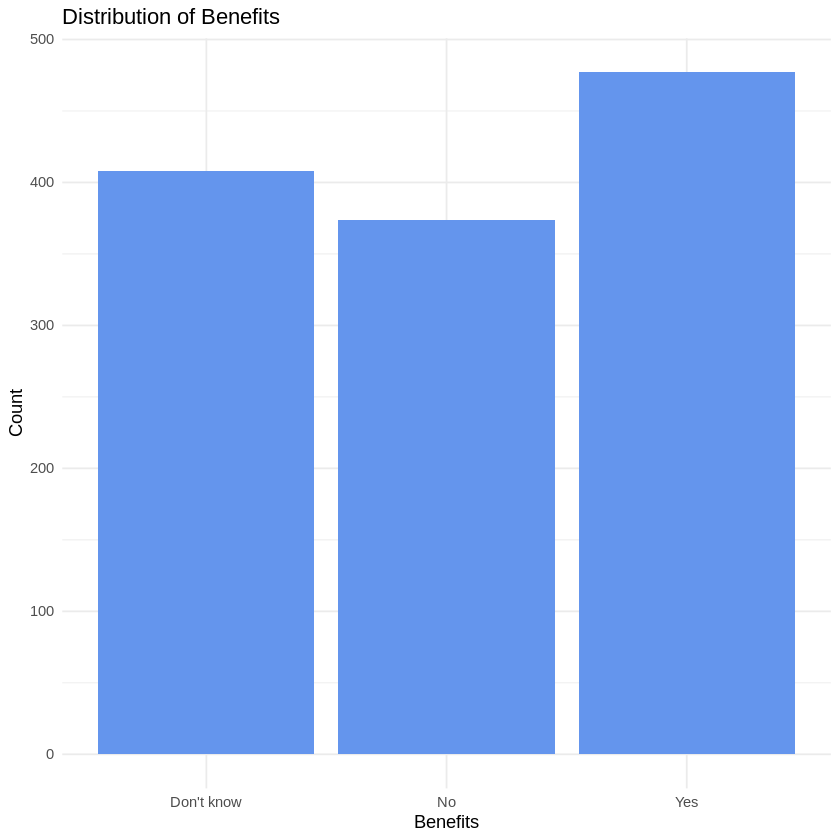

`summarise()` has grouped output by 'key'. You can override using the `.groups`
argument.


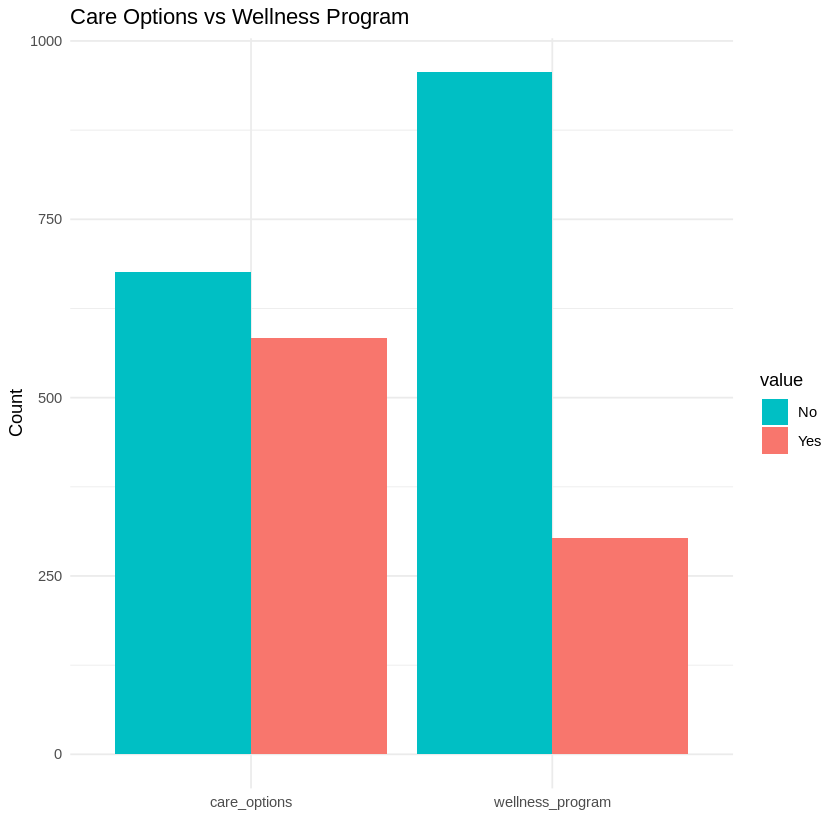

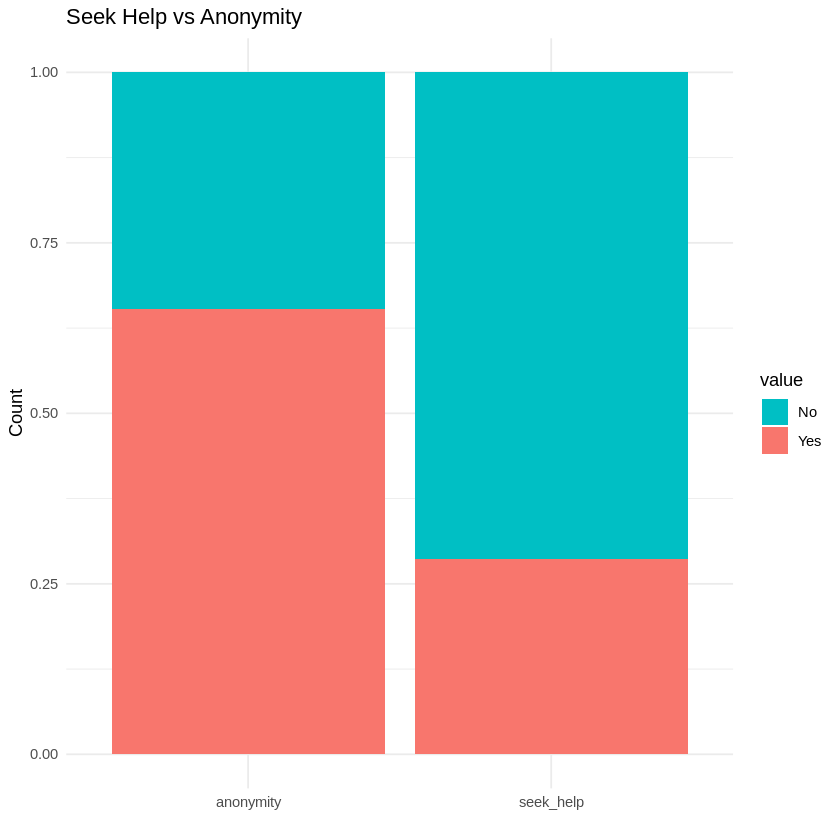

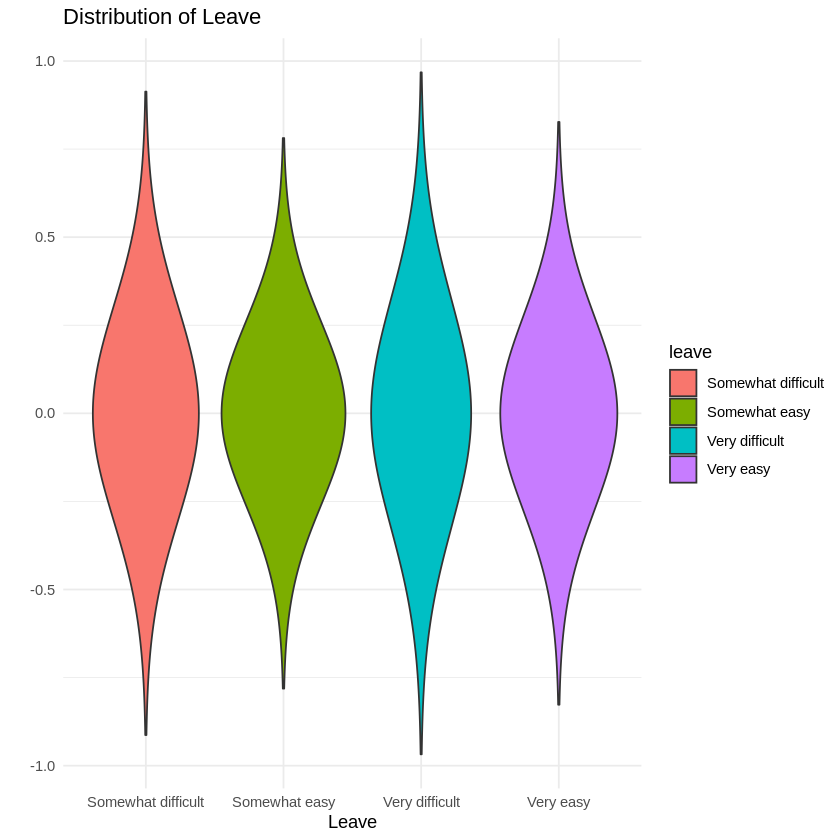

`summarise()` has grouped output by 'care_options'. You can override using the
`.groups` argument.


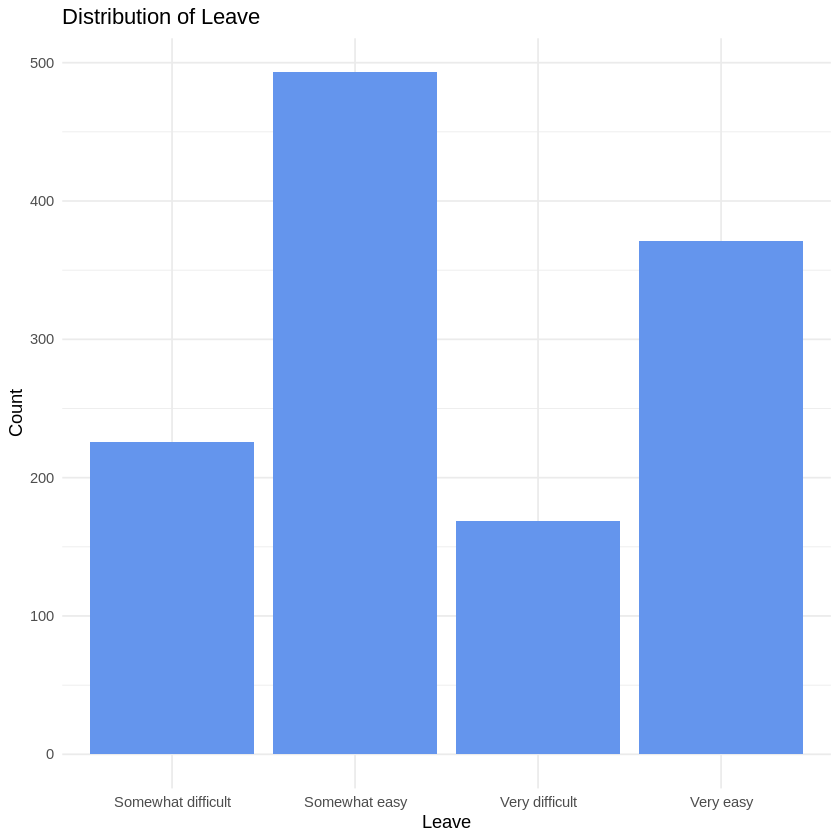

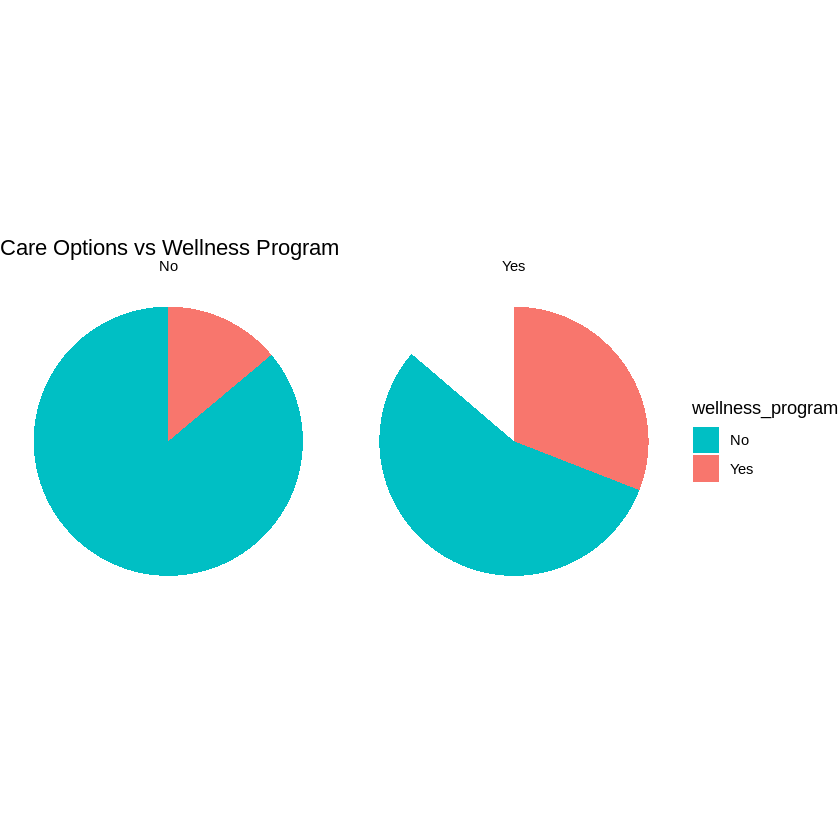

In [ ]:

# Plot the distribution of the benefits variable
ggplot(df, aes(x = benefits)) +
  geom_bar(fill = "cornflowerblue") +
  ggtitle("Distribution of Benefits") +
  labs(x = "Benefits", y = "Count") +
  theme_minimal()

# Plot the relationship between care_options and wellness_program
df %>% 
  select(care_options, wellness_program) %>%
  gather() %>%
  group_by(key, value) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = key, y = count, fill = value)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Care Options vs Wellness Program") +
  labs(x = "", y = "Count") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D")) +
  theme_minimal()

# Plot the relationship between seek_help and anonymity
df %>% 
  select(seek_help, anonymity) %>%
  gather() %>%
  group_by(key, value) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = key, y = count, fill = value)) +
  geom_bar(stat = "identity", position = "fill") +
  ggtitle("Seek Help vs Anonymity") +
  labs(x = "", y = "Count") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D")) +
  theme_minimal()

# Plot the distribution of the leave variable using a violin plot
ggplot(df, aes(x = leave, y = 0, fill = leave)) +
  geom_violin(trim = FALSE) +
  ggtitle("Distribution of Leave") +
  labs(x = "Leave", y = "") +
  theme_minimal()

# Plot the distribution of the leave variable with barchart
ggplot(df, aes(x = leave)) +
  geom_bar(fill = "cornflowerblue") +
  ggtitle("Distribution of Leave") +
  labs(x = "Leave", y = "Count") +
  theme_minimal()

# Get counts for each combination of care_options and wellness_program
df_counts <- df %>%
  group_by(care_options, wellness_program) %>%
  summarise(count = n()) %>%
  ungroup()

# Plot as a pie chart with comparison between care options
df_counts %>%
  ggplot(aes(x = "", y = count, fill = wellness_program)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  facet_wrap(~care_options) +
  ggtitle("Care Options vs Wellness Program") +
  theme_void() +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF"))


# Exploratory Data Analysis - Employees' behaviorial characteristics

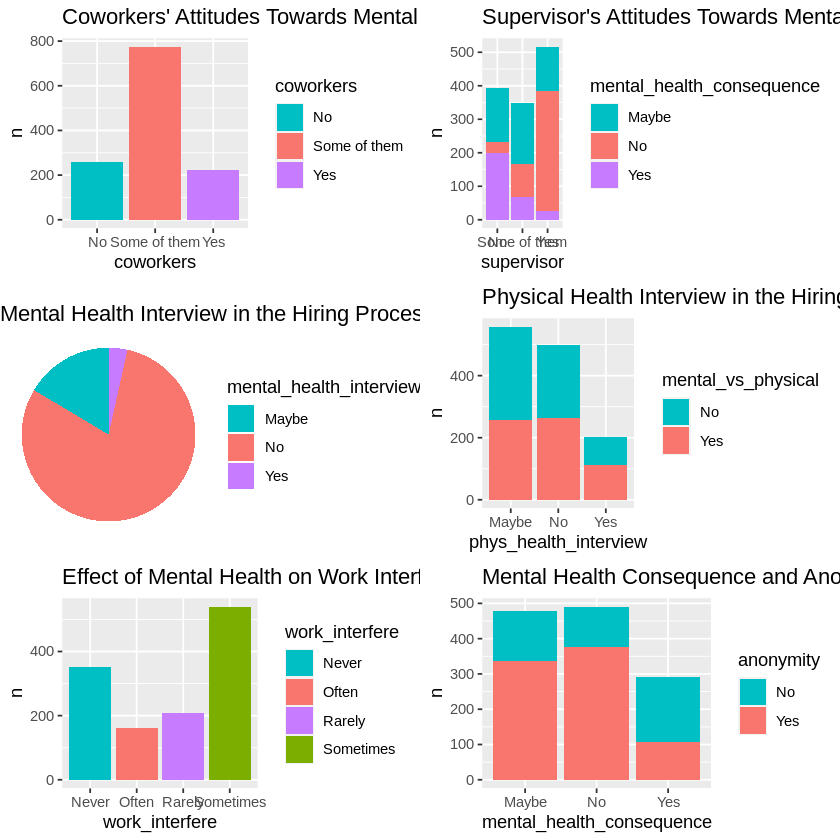

In [ ]:
plot1 <- df %>% 
  count(coworkers) %>% 
  ggplot(aes(x = coworkers, y = n, fill = coworkers)) +
  geom_bar(stat = "identity") +
  labs(title = "Coworkers' Attitudes Towards Mental Health") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF", "#7CAE00", "#FFC400", "#00D2C9", "#993404"))

plot2 <-df %>% 
  count(supervisor, mental_health_consequence) %>% 
  ggplot(aes(x = supervisor, y = n, fill = mental_health_consequence)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Supervisor's Attitudes Towards Mental Health and its Consequence") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF"))


plot3 <-df %>% 
  count(mental_health_interview) %>%
  ggplot(aes(x = "", y = n, fill = mental_health_interview)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Mental Health Interview in the Hiring Process") +
  theme_void() +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF"))

plot4 <-df %>% 
  count(phys_health_interview, mental_vs_physical) %>% 
  ggplot(aes(x = phys_health_interview, y = n, fill = mental_vs_physical)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Physical Health Interview in the Hiring Process and Mental vs. Physical Health") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D"))

plot5 <-df %>% 
  count(work_interfere) %>% 
  ggplot(aes(x = work_interfere, y = n, fill = work_interfere)) +
  geom_bar(stat = "identity") +
  labs(title = "Effect of Mental Health on Work Interference") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF", "#7CAE00", "#FFC400"))

plot6 <-df %>% 
  count(mental_health_consequence, anonymity) %>% 
  ggplot(aes(x = mental_health_consequence, y = n, fill = anonymity)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Mental Health Consequence and Anonymity") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF", "#7CAE00", "#FFC400"))



grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, ncol=2)


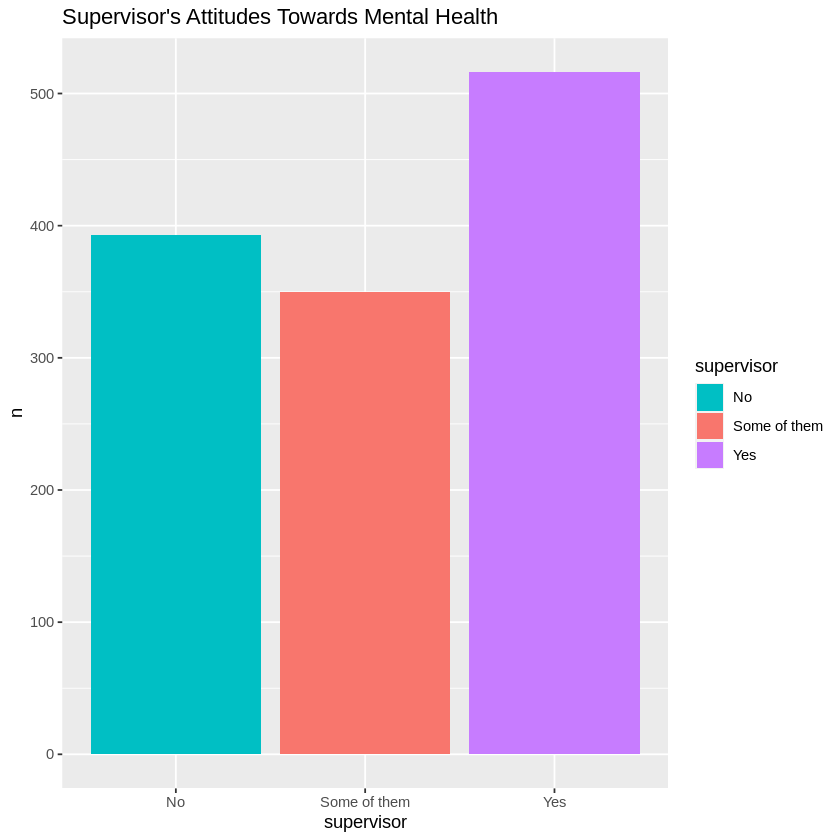

In [ ]:
plot2 <-df %>% 
  count(supervisor) %>% 
  ggplot(aes(x = supervisor, y = n, fill = supervisor)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Supervisor's Attitudes Towards Mental Health") +
  scale_fill_manual(values = c("#00BFC4", "#F8766D", "#C77CFF"))

plot2

# Exploratory Data Analysis - Response Variable "Treatment"

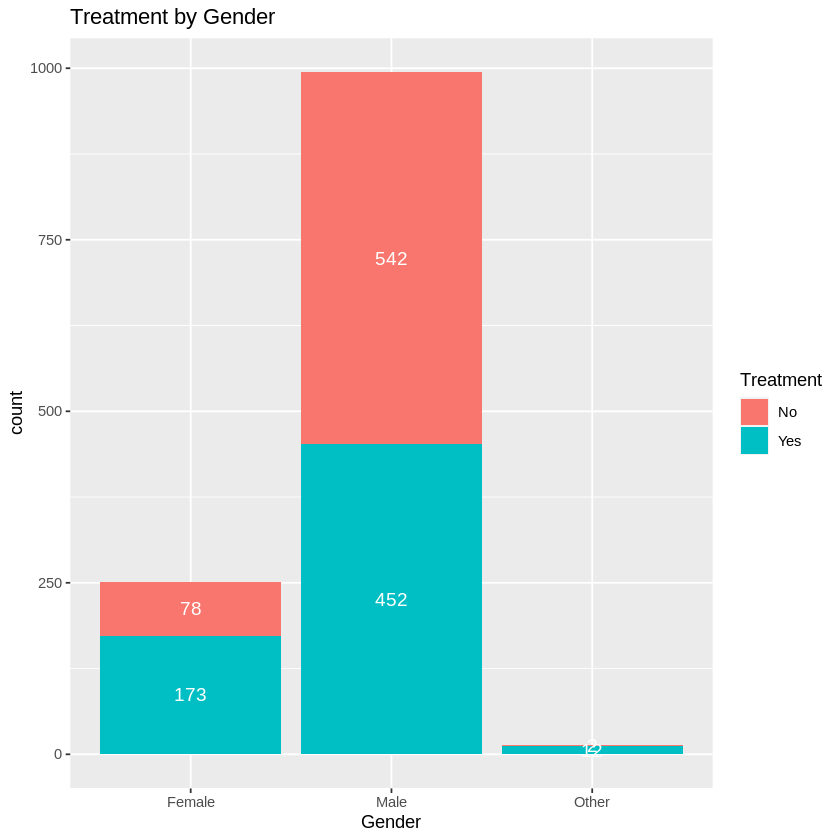

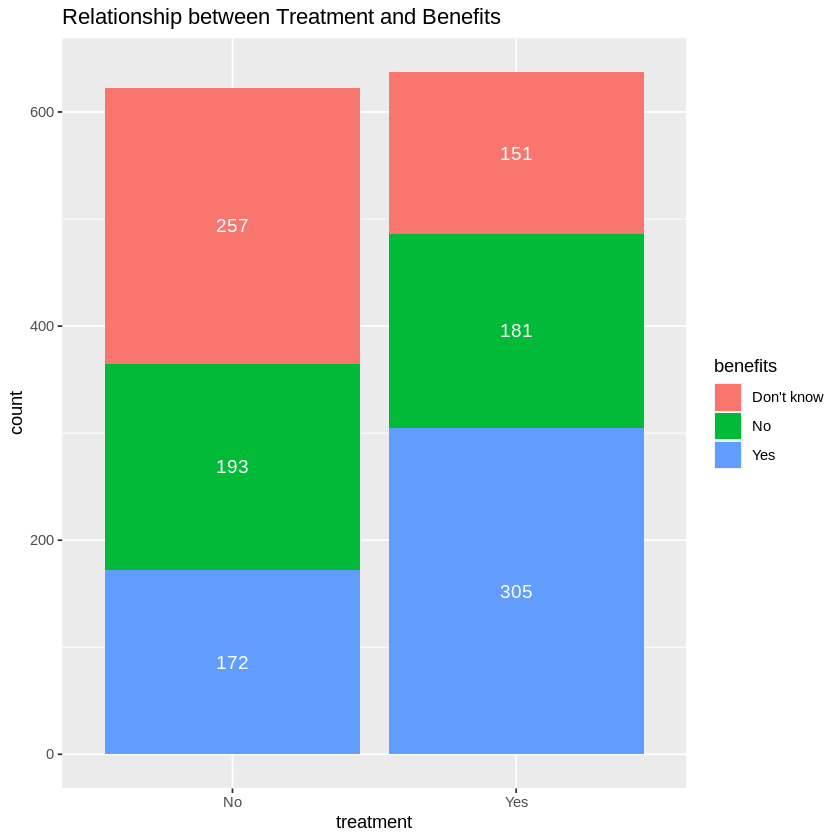

In [ ]:
#Relationship between Gender and Treatment Variables
ggplot(df, aes(x = Gender, fill = treatment)) +
  geom_bar() +
  labs(title = "Treatment by Gender", fill = "Treatment") +
  geom_text(
    aes(label = after_stat(count)),
    stat = "count",
    position = position_stack(vjust = 0.5),
    size = 4,
    color = "white"
  )

#Relationship between Benefits and Treatment Variables

ggplot(df, aes(x = treatment, fill = benefits)) +
  geom_bar() +
  ggtitle("Relationship between Treatment and Benefits") +
  geom_text(
    aes(label = after_stat(count)),
    stat = "count",
    position = position_stack(vjust = 0.5),
    size = 4,
    color = "white"
  )


Warning message in p1 + p2 + p3:
“longer object length is not a multiple of shorter object length”
Warning message in p1 + p2 + p3 + p4:
“longer object length is not a multiple of shorter object length”


[1] 3.2 8.4 8.4

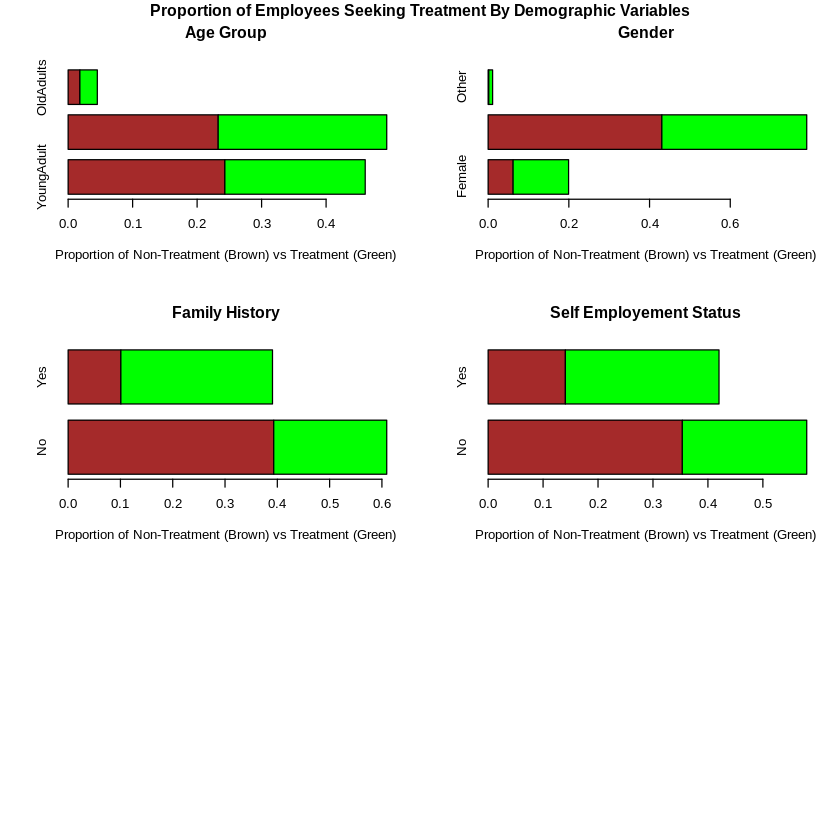

In [ ]:
#Relationship between Treatment Variable and demographic variables - both binary - using proportion charts 


par(mfrow=c(3,2))

#1. Demographic: age, gender, family_history, state, country, self-employed 

tb_age = xtabs(~treatment+age_group, data=df)
p1 <- barplot(prop.table(tb_age), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Age Group")


tb_gender = xtabs(~treatment+Gender, data=df)
p2 <- barplot(prop.table(tb_gender), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Gender")


tb_fh = xtabs(~treatment+family_history, data=df)
p3 <- barplot(prop.table(tb_fh), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Family History")

tb_emp = xtabs(~treatment+self_employed, data=df)
p4 <- barplot(prop.table(tb_emp), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Self Employement Status")


p1 + p2 +p3 +p4

#mtext("Employees' Demographic Variables", side = 3, line = -1, outer = TRUE)


#mtext(substitute(paste(bold("Employees' Demographic Variables"))), side = 3, line = -1, outer = TRUE, cex=1.2)

par(mfrow=c(3,2),oma=c(0,0,2,0))

title("Proportion of Employees Seeking Treatment By Demographic Variables", outer=TRUE, line = 1)




[1] 1.6 4.2

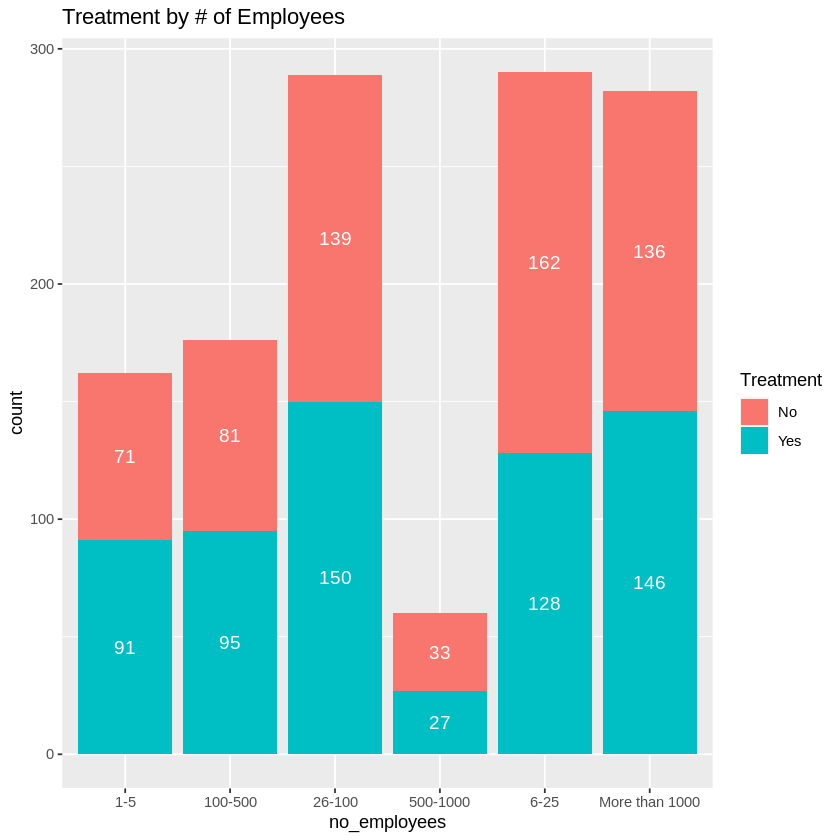

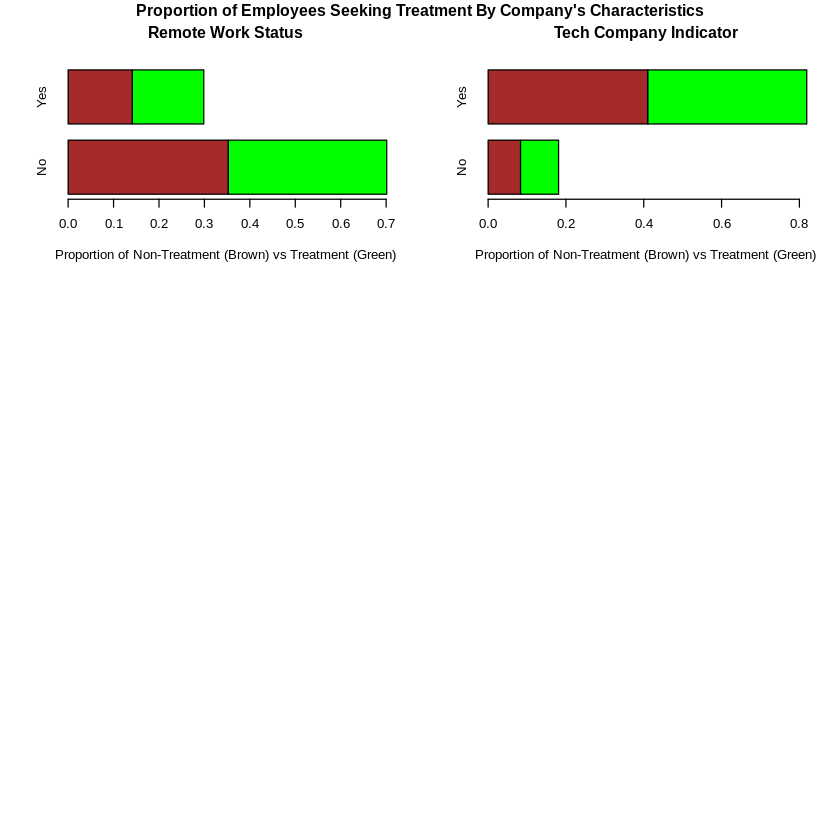

In [ ]:
#Relationship between Treatment Variable and Company's characteristics - both binary - using proportion charts 


#2. no_employees, remote_work,  tech_company

par(mfrow=c(3,2))



barp <- ggplot(df, aes(x = no_employees, fill = treatment)) +
  geom_bar() +
  labs(title = "Treatment by # of Employees", fill = "Treatment") +
  geom_text(
    aes(label = after_stat(count)),
    stat = "count",
    position = position_stack(vjust = 0.5),
    size = 4,
    color = "white"
  )    
barp 

tb_remote = xtabs(~treatment+remote_work, data=df)
p5 <- barplot(prop.table(tb_remote), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Remote Work Status")


tb_techC = xtabs(~treatment+tech_company, data=df)
p6 <- barplot(prop.table(tb_techC ), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Tech Company Indicator")



p5 + p6 

par(mfrow=c(3,2),oma=c(0,0,2,0))

title("Proportion of Employees Seeking Treatment By Company's Characteristics", outer=TRUE, line=1)




Warning message in p7 + p8:
“longer object length is not a multiple of shorter object length”
Warning message in p7 + p8 + p9:
“longer object length is not a multiple of shorter object length”
Warning message in p7 + p8 + p9 + p10:
“longer object length is not a multiple of shorter object length”
Warning message in p7 + p8 + p9 + p10 + p11:
“longer object length is not a multiple of shorter object length”
Warning message in p7 + p8 + p9 + p10 + p11 + p12:
“longer object length is not a multiple of shorter object length”


[1]  4.8 12.6 10.0  8.7

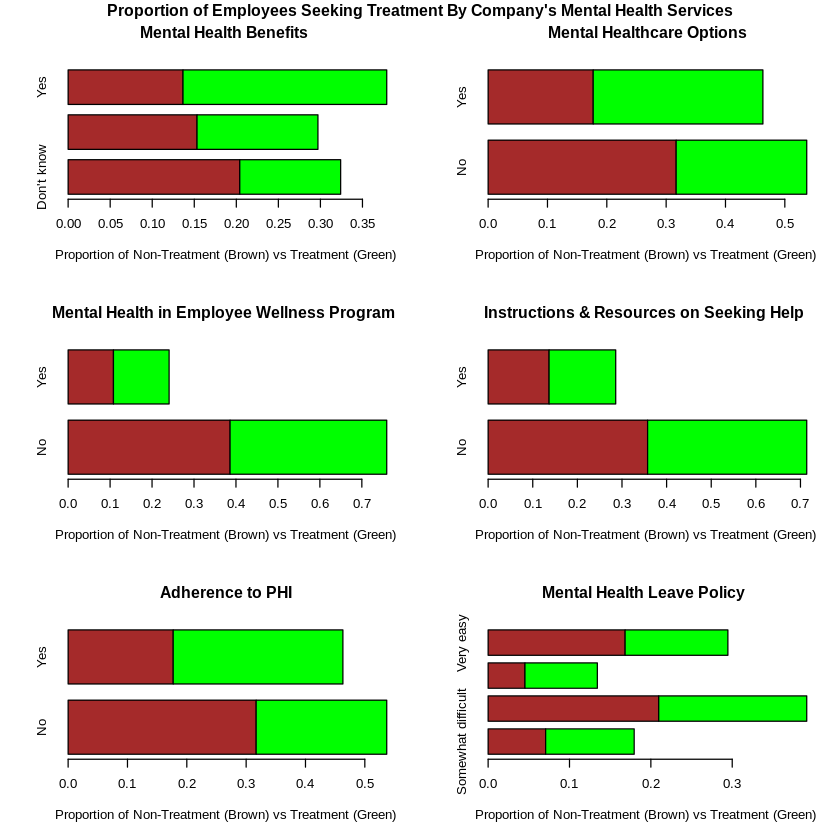

In [ ]:
#Relationship between Treatment Variable and company's mental health services - both binary - using proportion charts 
# Company's mental health services: benefits, care_options, wellness_program, seek_help, anonymity, leave

par(mfrow=c(3,2))

#2. no_employees, remote_work,  tech_company

tb_benefits = xtabs(~treatment+benefits, data=df)
p7 <- barplot(prop.table(tb_benefits), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Mental Health Benefits ")


tb_careop = xtabs(~treatment+care_options, data=df)
p8 <- barplot(prop.table(tb_careop), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main=" Mental Healthcare Options")

tb_wellness = xtabs(~treatment+wellness_program, data=df)
p9 <- barplot(prop.table(tb_wellness), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Mental Health in Employee Wellness Program ")

tb_help = xtabs(~treatment+seek_help, data=df)
p10 <- barplot(prop.table(tb_help), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Instructions & Resources on Seeking Help ")

tb_phi = xtabs(~treatment+anonymity, data=df)
p11 <- barplot(prop.table(tb_careop), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Adherence to PHI") #protective health information

tb_leave = xtabs(~treatment+leave, data=df)
p12 <- barplot(prop.table(tb_leave), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Mental Health Leave Policy ") #protective health information


p7 + p8 + p9 + p10 + p11 + p12


par(mfrow=c(3,2),oma=c(0,0,2,0))

title("Proportion of Employees Seeking Treatment By Company's Mental Health Services", outer=TRUE, line=1)


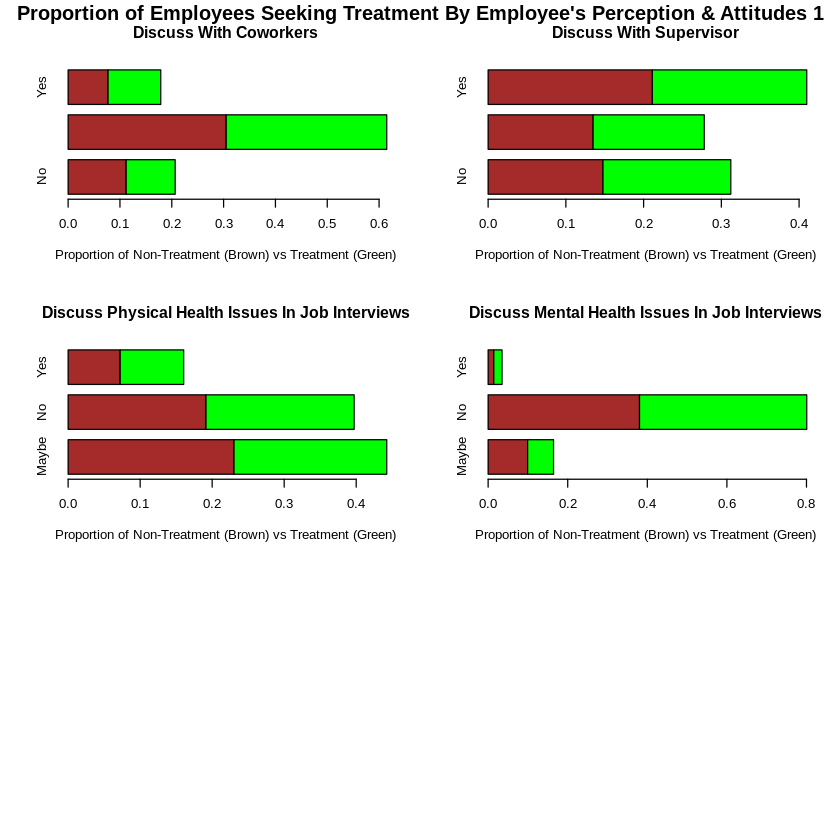

In [ ]:
#Relationship between Treatment Variable and Employees' behaviorial characteristics - both binary - using proportion charts 

#4. Employees' behaviorial characteristics: coworkers, supervisor, mental_health_interview, phys_health_interview, work_interfere, 
#mental_health_consequence, phys_health_consequence, mental_vs_physical (last 3 are employees perceptions)

par(mfrow=c(3,2))

tb_coworkers = xtabs(~treatment+coworkers, data=df)
p13 <- barplot(prop.table(tb_coworkers), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Discuss With Coworkers")


tb_sup = xtabs(~treatment+supervisor, data=df)
p14 <- barplot(prop.table(tb_sup), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Discuss With Supervisor")

tb_phys_interview = xtabs(~treatment+phys_health_interview, data=df)
p15 <- barplot(prop.table(tb_phys_interview), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Discuss Physical Health Issues In Job Interviews")

tb_ment_interview = xtabs(~treatment+mental_health_interview, data=df)
p16 <- barplot(prop.table(tb_ment_interview), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Discuss Mental Health Issues In Job Interviews")


par(mfrow=c(2,2),oma=c(0,0,2,0))
title("Proportion of Employees Seeking Treatment By Employee's Perception & Attitudes 1", outer=TRUE, line=1)




Warning message in p13 + p14 + p15 + p16 + p17:
“longer object length is not a multiple of shorter object length”
Warning message in p13 + p14 + p15 + p16 + p17 + p18:
“longer object length is not a multiple of shorter object length”
Warning message in p13 + p14 + p15 + p16 + p17 + p18 + p19:
“longer object length is not a multiple of shorter object length”
Warning message in p13 + p14 + p15 + p16 + p17 + p18 + p19 + p20:
“longer object length is not a multiple of shorter object length”


[1]  6.4 16.8 27.2 10.3

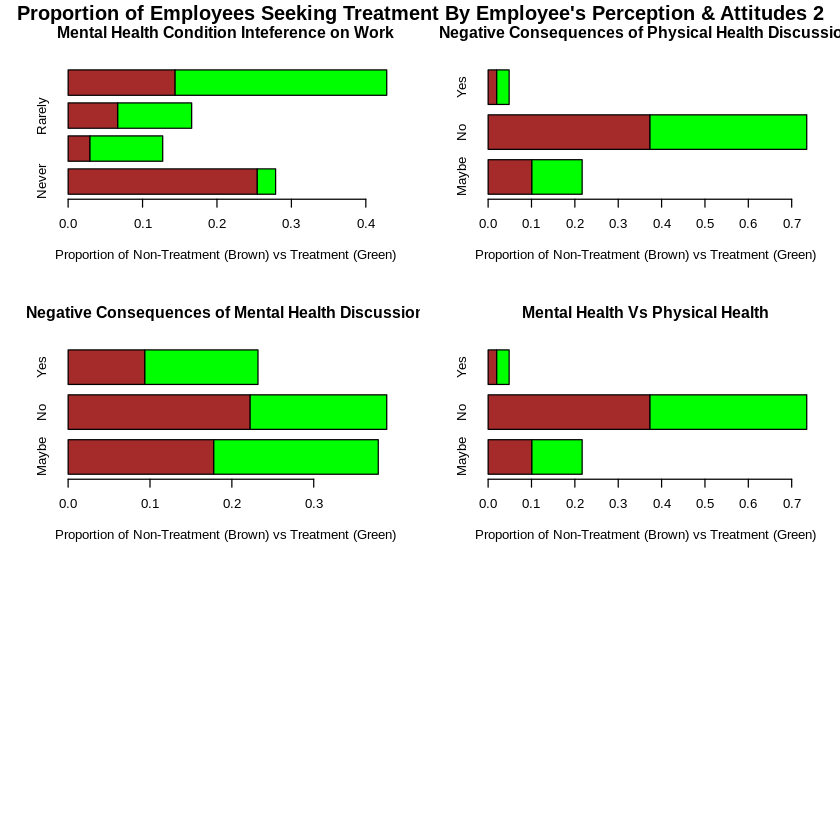

In [ ]:
par(mfrow=c(3,2))

tb_work_interfere = xtabs(~treatment+work_interfere, data=df)
p17 <- barplot(prop.table(tb_work_interfere), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Mental Health Condition Inteference on Work") 


tb_phys_cons = xtabs(~treatment+phys_health_consequence, data=df)
p18 <- barplot(prop.table(tb_phys_cons), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Negative Consequences of Physical Health Discussion") 

tb_ment_cons = xtabs(~treatment+mental_health_consequence, data=df)
p19 <- barplot(prop.table(tb_ment_cons), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Negative Consequences of Mental Health Discussion") 

tb_mentphys_cons = xtabs(~treatment+mental_vs_physical, data=df)
p20 <- barplot(prop.table(tb_phys_cons), axes=T, space=0.3, horiz=T, xlab="Proportion of Non-Treatment (Brown) vs Treatment (Green)",
        col=c("brown","green"), main="Mental Health Vs Physical Health") 

p13 + p14 + p15 + p16 + p17 + p18 + p19 +p20

par(mfrow=c(2,2),oma=c(0,0,2,0))
title("Proportion of Employees Seeking Treatment By Employee's Perception & Attitudes 2", outer=TRUE, line=1)


# Exploratory Data Analysis - Response Variable "Observed Consequence"

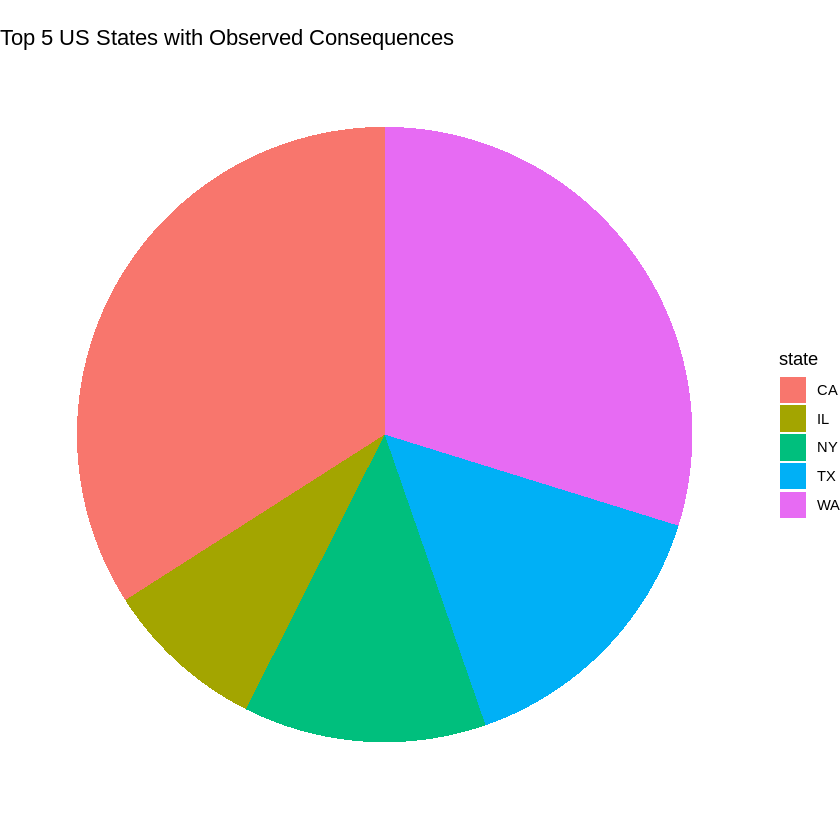

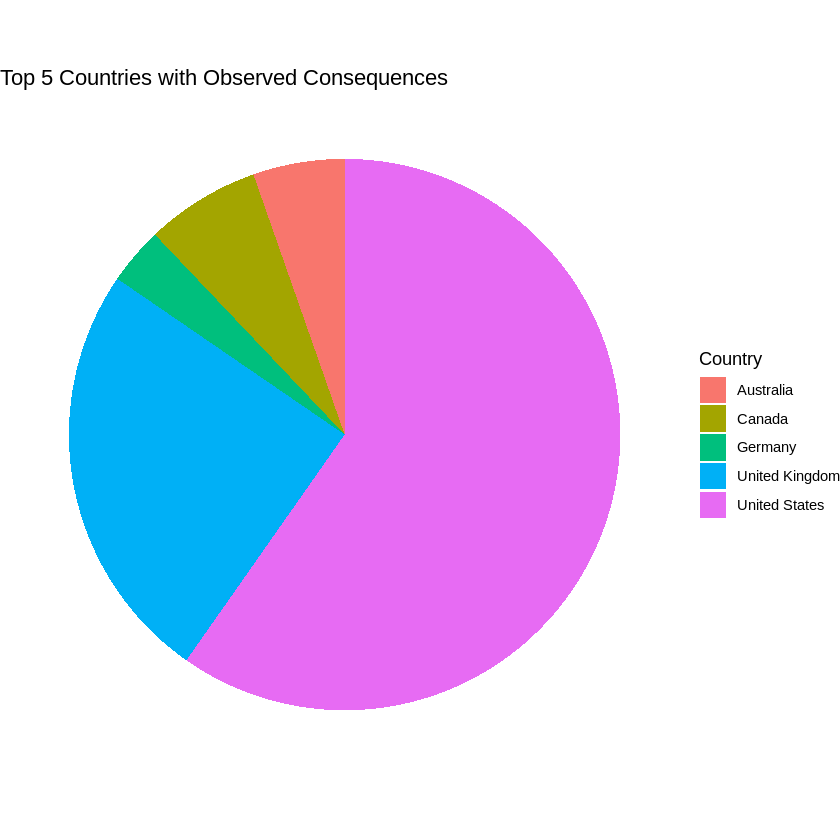

In [ ]:
count_country <- count(df[df$obs_consequence=='Yes',], Country)
count_states <- count(df[(df$obs_consequence=='Yes' & df$Country=='United States'),], state) %>% mutate(
  state = as.character(state),
  state = ifelse(is.na(state), "Unknown", state),
  state = as.factor(state)
  )


# Get top 5 states and countries by count
top_states <- count_states %>% 
  arrange(desc(n)) %>% 
  head(5)
top_countries <- count_country %>% 
  arrange(desc(n)) %>% 
  head(5)


# Plot top 5 US states and countries
ggplot(top_states, aes(x="", y=n, fill=state)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  ggtitle('Top 5 US States with Observed Consequences') +
  theme_void() 

ggplot(top_countries, aes(x="", y=n, fill=Country)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  ggtitle('Top 5 Countries with Observed Consequences') +
  theme_void() 


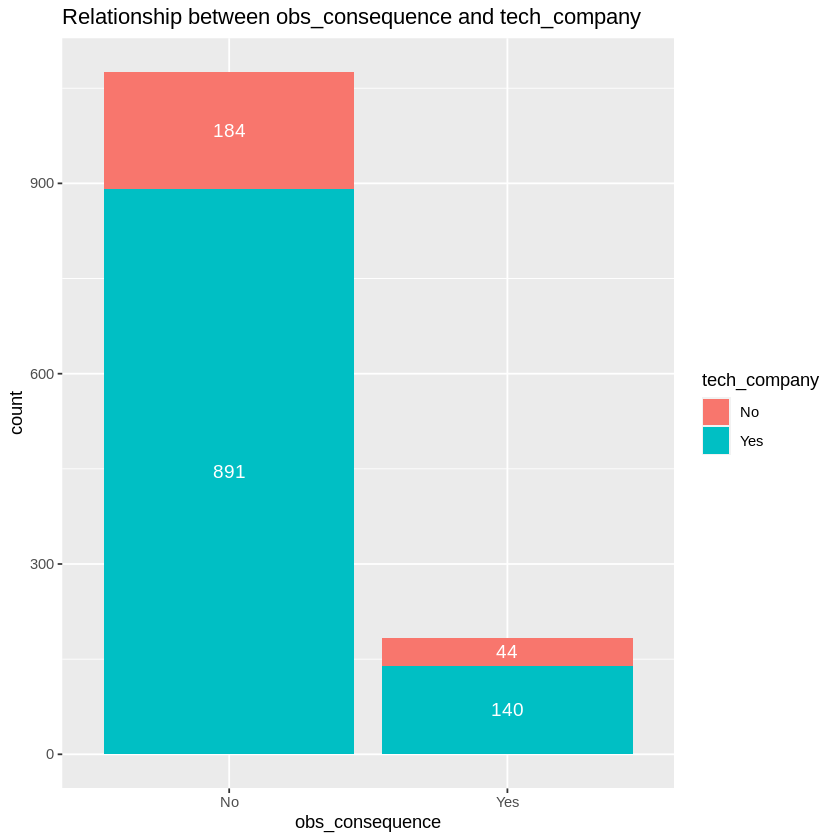

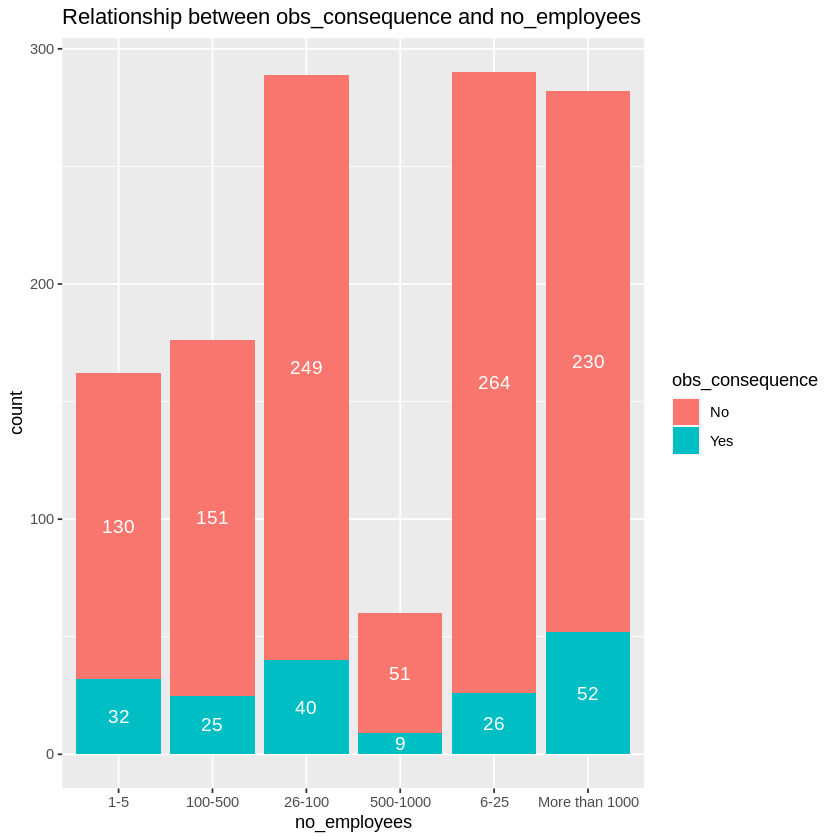

In [ ]:
#Relationship between Observed Consequence and Tech_Company
ggplot(df, aes(x = obs_consequence, fill = tech_company)) +
  geom_bar() +
  ggtitle("Relationship between obs_consequence and tech_company") +
  geom_text(
    aes(label = after_stat(count)),
    stat = "count",
    position = position_stack(vjust = 0.5),
    size = 4,
    color = "white"
  )

  #Relationship between Observed Consequence and Tech_Company
ggplot(df, aes(x = no_employees, fill = obs_consequence)) +
  geom_bar() +
  ggtitle("Relationship between obs_consequence and no_employees") +
  geom_text(
    aes(label = after_stat(count)),
    stat = "count",
    position = position_stack(vjust = 0.5),
    size = 4,
    color = "white"
  )

# Data Split

In [ ]:
#data split

# Set the seed for reproducibility
set.seed(123)

# Create an index for the training and testing sets; Note - "treatment and "obs_consequence" are the response vars according to the research questions above
index <- createDataPartition(paste(df$treatment, df$obs_consequence), p = 0.7, list = FALSE)

# Create the training and testing sets
train_data <- df[index, ]
test_data <- df[-index, ]

In [ ]:
dim(train_data)
dim(test_data)

[1] 884  26

[1] 375  26

## Research Questions

1. What factors are associated with an employee seeking treatment for mental health conditions?  

  Methods: correlation analysis, logistic regression, decision trees 


2. Can we predict which employees are more likely to seek treatment for mental health conditions based on their demographic information and work-related factors? 

  Methods: classification analysis, decision trees, random forests 


3. Does a company that support/provide mental health benefit leads to more employee seeking treatment for mental health conditions?  

  Methods: chi-squared test, logistic regression 


4. Which type of companies, if any, are more likely to see negative consequences for employees with mental health conditions?

  Methods: logistic regression, random forest for feature selection 

In [ ]:
#fitting various models on training data to answer 4 research questions

# Research Question #1 - What factors are associated with an employee seeking treatment for mental health conditions? 

## Q1 - Correlation Analysis - Various methods

In [ ]:
# Load required packages


# Filter relevant variables for the analysis
variables <- c("treatment", "Gender", "Country", "state", "self_employed", "family_history", "work_interfere", "no_employees", "remote_work", "tech_company", "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence", "age_group")

df_filtered <- df[,variables]

# Function to calculate Chi-squared Test, Cramér's V, and Goodman and Kruskal's Lambda
analyze_association <- function(df, var1, var2) {
  # Chi-squared Test
  chisq_test <- chisq.test(df[[var1]], df[[var2]])
  
  # Cramér's V
  cramers_v <- sqrt(chisq_test$statistic / (sum(chisq_test$observed) * (min(dim(chisq_test$observed)) - 1)))
  

  return(list(chisq_test = chisq_test, cramers_v = cramers_v))
}

# Initialize an empty data frame to store results
results <- data.frame(variable = character(),
                      chi_squared = numeric(),
                      p_value = numeric(),
                      df = integer(),
                      cramers_v = numeric(),
                      lambda = numeric(),
                      stringsAsFactors = FALSE)

# Analyze the association between "treatment" and other variables and store results in the table
for (variable in variables) {
  if (variable != "treatment") {
    result <- analyze_association(df_filtered, "treatment", variable)
    results <- rbind(results, data.frame(variable = variable,
                                         chi_squared = result$chisq_test$statistic,
                                         p_value = result$chisq_test$p.value,
                                         df = result$chisq_test$parameter,
                                         cramers_v = result$cramers_v,
                                         stringsAsFactors = FALSE))
  }
}

# Print the results table
#print(results)


Warning message in chisq.test(df[[var1]], df[[var2]]):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(df[[var1]], df[[var2]]):
“Chi-squared approximation may be incorrect”


In [ ]:


panderOptions("digits", 4)
panderOptions("table.split.table", Inf)
pander(results, caption = "Association Analysis Results")



|     &nbsp;      |         variable          | chi_squared |  p_value  | df | cramers_v |
|:---------------:|:-------------------------:|:-----------:|:---------:|:--:|:---------:|
|  **X-squared**  |          Gender           |    51.08    | 8.108e-12 | 2  |  0.2014   |
| **X-squared1**  |          Country          |    69.8     |  0.01706  | 47 |  0.2355   |
| **X-squared2**  |           state           |    96.67    | 8.052e-06 | 44 |  0.2771   |
| **X-squared3**  |       self_employed       |    91.7     | 1.01e-21  | 1  |  0.2699   |
| **X-squared4**  |      family_history       |    178.3    | 1.158e-40 | 1  |  0.3763   |
| **X-squared5**  |      work_interfere       |    350.2    | 1.34e-75  | 3  |  0.5274   |
| **X-squared6**  |       no_employees        |    8.765    |  0.1188   | 5  |  0.08344  |
| **X-squared7**  |        remote_work        |   0.7996    |  0.3712   | 1  |  0.0252   |
| **X-squared8**  |       tech_company        |    1.093    |  0.2958   | 1  |  0.02946 

## Q1 - Logistic Regression

Based on the table, we can see that the variables most correlated with "treatment" are those with the lowest p-values and highest Cramér's V values. Let's consider variables with a p-value < 0.05 to be significant. Based on this criterion, we can select the following variables: Gender, state (country would also qualify but decided to keep only one geographical variable), self_employed, family_history, work_interfere, benefits, care_options, leave, mental_health_consequence, coworkers, mental_health_interview, and obs_consequence.

Now, let's create a logistic regression model using these variables to further investigate the factors associated with an employee seeking treatment for mental health conditions.

In [ ]:
# Create a logistic regression model
logistic_model <- glm(treatment ~ Gender + state + self_employed + family_history +
                        work_interfere + benefits + care_options + leave + mental_health_consequence +
                        coworkers + mental_health_interview + obs_consequence,
                      data = train_data, family = binomial)

# Display the model summary
summary(logistic_model)



Call:
glm(formula = treatment ~ Gender + state + self_employed + family_history + 
    work_interfere + benefits + care_options + leave + mental_health_consequence + 
    coworkers + mental_health_interview + obs_consequence, family = binomial, 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5179  -0.6164   0.0990   0.7226   2.6141  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -0.44094    1.44130  -0.306  0.75966    
GenderMale                     -0.58427    0.25293  -2.310  0.02089 *  
GenderOther                     0.22586    1.01354   0.223  0.82366    
stateAZ                        -3.82282    1.49671  -2.554  0.01064 *  
stateCA                        -1.96756    1.37641  -1.429  0.15286    
stateCO                        -2.29922    1.64769  -1.395  0.16289    
stateCT                        -1.51700    1.63356  -0.929  0.35307    
stateDC                  

The logistic regression model aims to identify the factors associated with an employee seeking treatment for mental health conditions. The table above shows the results of the model, which includes a variety of variables as predictors. 

Some interpretations of the most relevant results:

- Gender: Males are less likely to seek treatment compared to females (Estimate = -0.51468, p < 0.05). The "other" gender category is not statistically significant (p > 0.05).

- Self-employed: Self-employed individuals are more likely to seek treatment (Estimate = 0.85715, p < 0.05).
- Family history: Employees with a family history of mental health conditions are more likely to seek treatment (Estimate = 1.22626, p < 0.001).
-Work interference: Employees who experience work interference due to mental health issues, whether often, rarely, or sometimes, are significantly more likely to seek treatment (p < 0.001 for all categories).
-Benefits: Employees with mental health benefits are more likely to seek treatment compared to those without benefits (Estimate = 0.81108, p < 0.01).
-Leave: Easier leave policies are associated with a higher likelihood of seeking treatment (Estimate for somewhat easy = -0.83293, p < 0.01; Estimate for very easy = -0.75400, p < 0.05).
-Mental health consequences: Employees who perceive no mental health consequences at work are less likely to seek treatment (Estimate = -0.53643, p < 0.05).
-Coworkers: Employees who are willing to discuss mental health with all coworkers are more likely to seek treatment (Estimate = 0.94691, p < 0.05).

### Cross Validation

In [ ]:
# Install and load the caret package

# Set up cross-validation
set.seed(123) # For reproducibility
cv_folds <- 10 # Number of k-folds

# Create a train control object to specify the cross-validation method
train_control <- trainControl(method = "cv", number = cv_folds)

# Fit the logistic regression model with cross-validation
cv_model <- train(treatment ~ Gender + state + self_employed + family_history + 
                     work_interfere + benefits + care_options + leave + mental_health_consequence + 
                     coworkers + mental_health_interview + obs_consequence,
                   data = df, # Replace 'dataset' with the name of your dataset
                   method = "glm",
                   family = "binomial",
                   trControl = train_control)

# Print the cross-validation results
print(cv_model)


Generalized Linear Model 

1259 samples
  12 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1132, 1134, 1133, 1133, 1134, 1133, ... 
Resampling results:

  Accuracy   Kappa    
  0.7711823  0.5419535



Based on the cross-validation results, the logistic regression model has a predictive accuracy of about 78.62%, which is a relatively good performance. However, there's always room for improvement by fine-tuning the model, selecting better predictors, or trying different modeling techniques.

## Q1 - Decision Tree

Based on the results from the logistic regression model, the most significant factors associated with employees seeking treatment for mental health conditions were:

Gender (Male)
State (various states with significant associations)
Self-employed (Yes)
Family history (Yes)
Work interference (Often, Rarely, Sometimes)
Benefits (Yes)
Leave (Somewhat easy, Very easy)
Mental health consequence (No)
Coworkers (Yes)
We will now build a decision tree model using these factors to further analyze the associations with the likelihood of seeking treatment.

R


In [ ]:
#install.packages('rpart')
#install.packages('rpart.plot')

Accuracy:  0.7546667 
Error:  0.2453333 


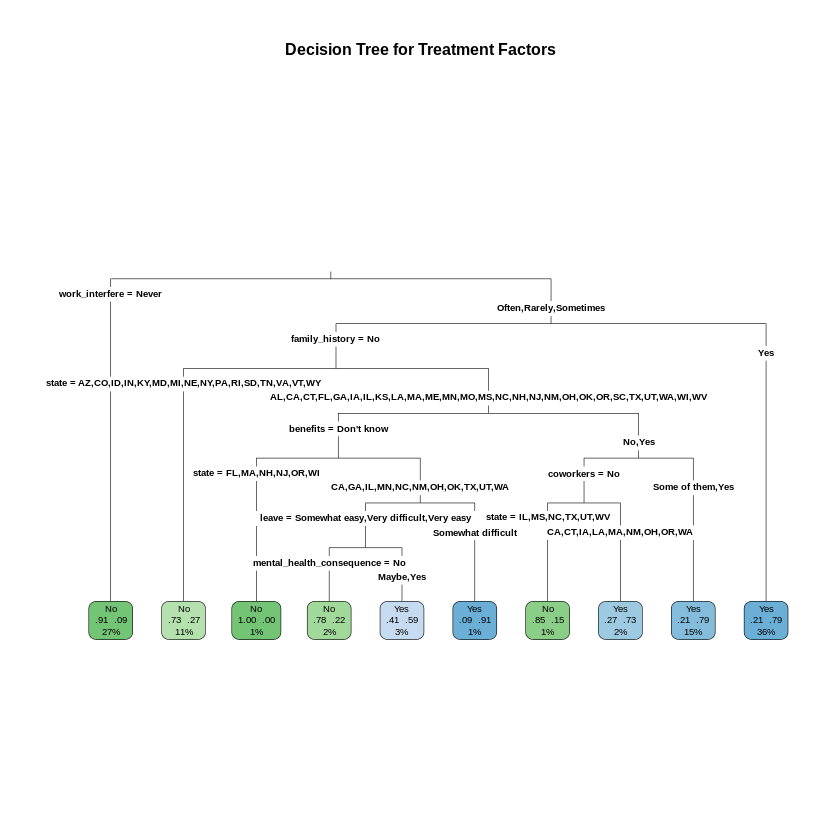

In [ ]:
# Extract the most relevant variables
relevant_vars_train <- train_data[, c("treatment", "Gender", "state", "self_employed", "family_history", "work_interfere", "benefits", "leave", "mental_health_consequence", "coworkers")]
relevant_vars_test <- test_data[, c("treatment", "Gender", "state", "self_employed", "family_history", "work_interfere", "benefits", "leave", "mental_health_consequence", "coworkers")]

# Build the decision tree model
decision_tree_model <- rpart(treatment ~ ., data = relevant_vars_train, method = "class")

# Visualize the decision tree
rpart.plot(decision_tree_model, type = 3, extra = 104, box.palette = "GnBu", fallen.leaves = TRUE, main = "Decision Tree for Treatment Factors")

# Make predictions using the test data
predictions <- predict(decision_tree_model, relevant_vars_test, type = "class")

# Calculate the confusion matrix
cm <- confusionMatrix(predictions, relevant_vars_test$treatment)

# Extract accuracy and error
accuracy <- cm$overall["Accuracy"]
error <- 1 - accuracy

# Print the results
cat("Accuracy: ", accuracy, "\n")
cat("Error: ", error, "\n")


The decision tree model with 884 observations has identified the following structure for factors associated with an employee seeking treatment for mental health conditions:

The most important factor is work interference (node 1).

If work interference is "Never," employees are less likely to seek treatment 
(90.9% No, 9.1% Yes; node 2). This node is terminal.
If work interference is "Often," "Rarely," or "Sometimes," the tree continues to analyze other factors (66.4% Yes, 33.6% No; node 3).
The next factor is the state where the employee is working (node 6).

If an employee is in one of the states listed in node 6, the tree continues to evaluate other factors (53.0% Yes, 47.0% No; node 12).
If an employee is in a state not listed in node 6, the likelihood of seeking treatment is higher (82.0% Yes, 18.0% No; node 7). This node is terminal.
Family history of mental health conditions is another significant factor (node 12).

If there's no family history, the tree splits by state again (39.1% Yes, 60.9% No; node 24).
If there's a family history, the likelihood of seeking treatment is higher (71.6% Yes, 28.4% No; node 13). This node is terminal.
At node 24, the tree splits by state again.

If an employee is in one of the states listed in node 24, they are less likely to seek treatment (75.7% No, 24.3% Yes; node 24). This node is terminal.
If an employee is in a state not listed in node 24, the tree evaluates work interference again (55.3% Yes, 44.7% No; node 25).
At node 25, the tree splits by work interference.

If work interference is "Rarely" or "Sometimes," the tree splits by benefits (46.7% Yes, 53.3% No; node 50).
If the employee doesn't know about the benefits, they are less likely to seek treatment (70.8% No, 29.2% Yes; node 100). This node is terminal.
If the employee knows about the benefits (either No or Yes), the likelihood of seeking treatment is higher (54.9% Yes, 45.0% No; node 101). This node is terminal.
If work interference is "Often," the likelihood of seeking treatment is higher (89.5% Yes, 10.5% No; node 51). This node is terminal.
In summary, the most critical factors associated with an employee seeking treatment for mental health conditions are work interference, state, and family history of mental health conditions. The decision tree model provides a more intuitive understanding of the interactions between these factors and their impact on the likelihood of an employee seeking treatment for mental health conditions.

# Research Question #2 - Can we predict which employees are more likely to seek treatment for mental health conditions based on their demographic information and work-related factors? 

### **Boosting**

In [ ]:

dftrain0 <- subset(train_data, select=-c(state, Country)) 
dftest0 <- subset(test_data, select=-c(state, Country))


[1] 94

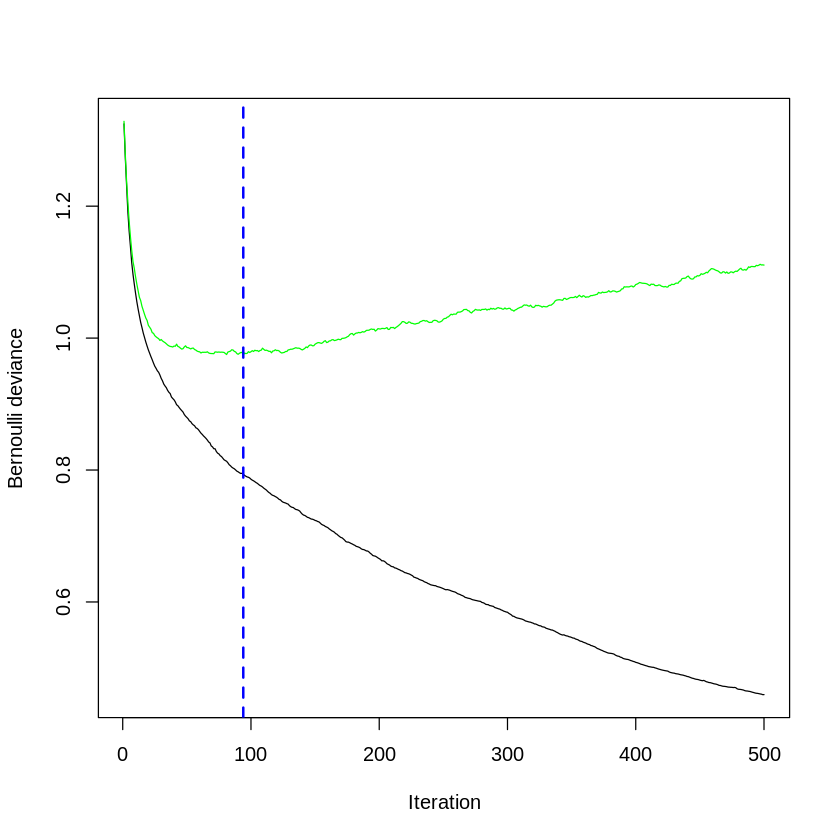

,var,rel.inf
,<chr>,<dbl>
work_interfere,work_interfere,24.2574971
no_employees,no_employees,11.6778728
Age,Age,11.2015051
leave,leave,7.1129631
benefits,benefits,6.2379214
family_history,family_history,5.5664803
coworkers,coworkers,4.2775770
mental_health_consequence,mental_health_consequence,4.2218172
self_employed,self_employed,3.5424235


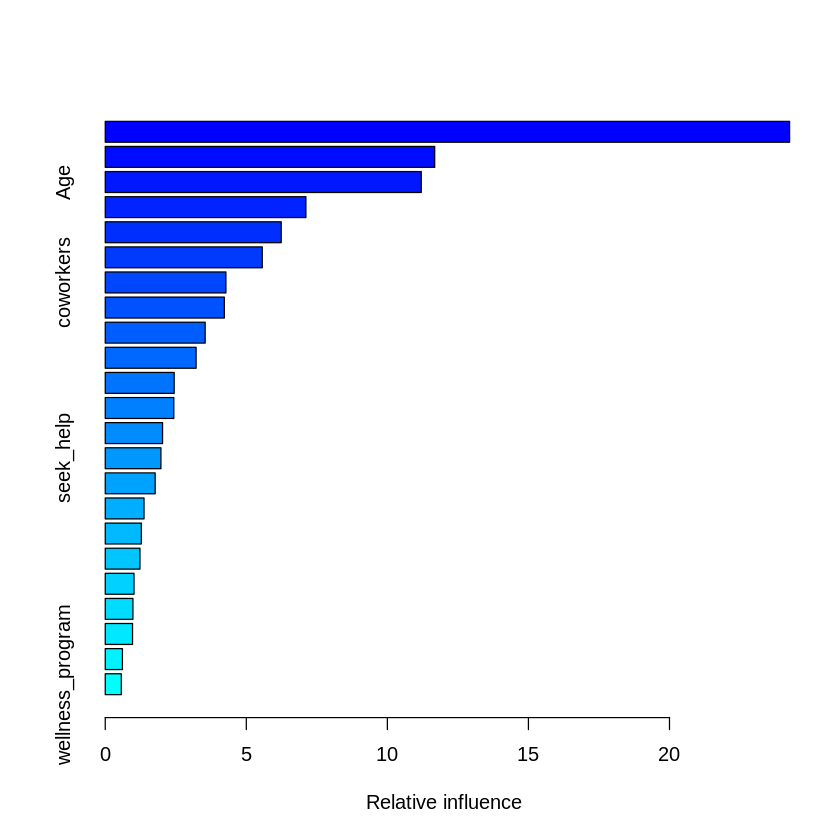

In [ ]:


dftrain <- dftrain0
dftest <- dftest0

dftrain$treatment<-ifelse(dftrain$treatment=="Yes",1,0)
dftest$treatment<-ifelse(dftest$treatment=="Yes",1,0)

y1    <- dftrain$treatment;
y2    <- dftest$treatment;


set.seed(789)
GBMbase <- gbm(treatment ~ .,data=dftrain,
               distribution = 'bernoulli',
               n.trees = 500, 
               shrinkage = 0.1, 
               interaction.depth = 3,
               n.minobsinnode = 10,
               cv.folds = 5)


## Model Inspection 
## Find the estimated optimal number of iterations
perf_GBMbase  = gbm.perf(GBMbase, method="cv") 
perf_GBMbase 

## summary model
## Which variances are important
summary(GBMbase)

In [ ]:

## Make Prediction

## Training error
train_prob_GBMbase  <- predict(GBMbase ,newdata = dftrain, n.trees=perf_GBMbase, type="response")
#train_pred_GBMbase [1:10]
 train_pred_GBMbase <- ifelse(train_prob_GBMbase < 0.5, 0, 1)
train_error_GBMbase <- sum(train_pred_GBMbase  != y1)/length(y1)  ##Training error = 
train_error_GBMbase 


## Testing Error
test_prob_GBMbase  <- predict(GBMbase, newdata = dftest, n.trees=perf_GBMbase, type="response")
#test_pred_GBMbase [1:10]
test_pred_GBMbase <- ifelse(test_prob_GBMbase < 0.5, 0, 1)
test_error_GBMbase <- sum(test_pred_GBMbase  != y2)/length(y2)   
test_error_GBMbase

[1] 0.1776018

[1] 0.2186667

In [ ]:


###tuning hyper parameters
set.seed(983)
train_control <- trainControl(
  method = "cv"
  , number = 10
  , search="grid"
  #, repeats = 5
)

set.seed(100)
#metric <- "Accuracy"

grid <- expand.grid(
  n.trees = seq(10, 500, by = 50)
  , interaction.depth = c(3,5,7)
  , shrinkage = c(0.01, 0.1)
  , n.minobsinnode = c(5, 10, 15)        
)

GBMtune <- train(as.factor(treatment) ~ .
               , method = 'gbm'
               , distribution = 'bernoulli'
               , data = dftrain
               , trControl = train_control
               , tuneGrid = grid
               , verbose = FALSE
               #, metric = metric
)

GBMtune

Stochastic Gradient Boosting 

884 samples
 23 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 795, 796, 796, 795, 796, 796, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.01       3                   5               10      0.7102911  0.4184772
  0.01       3                   5               60      0.7250000  0.4492319
  0.01       3                   5              110      0.7249872  0.4492559
  0.01       3                   5              160      0.7306435  0.4605418
  0.01       3                   5              210      0.7351890  0.4696415
  0.01       3                   5              260      0.7453779  0.4901526
  0.01       3                   5              310      0.7521578  0.5036555
  0.01       3                   5              360      0.7611977  0.5217440
  0.01       3                   5              410   

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
92,60,3,0.1,5


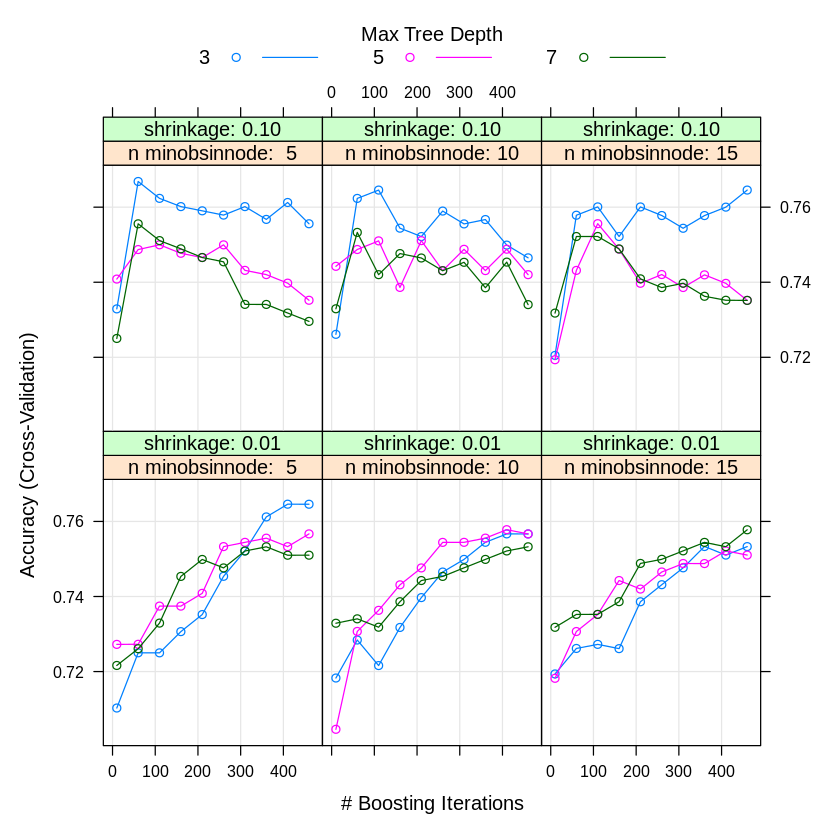

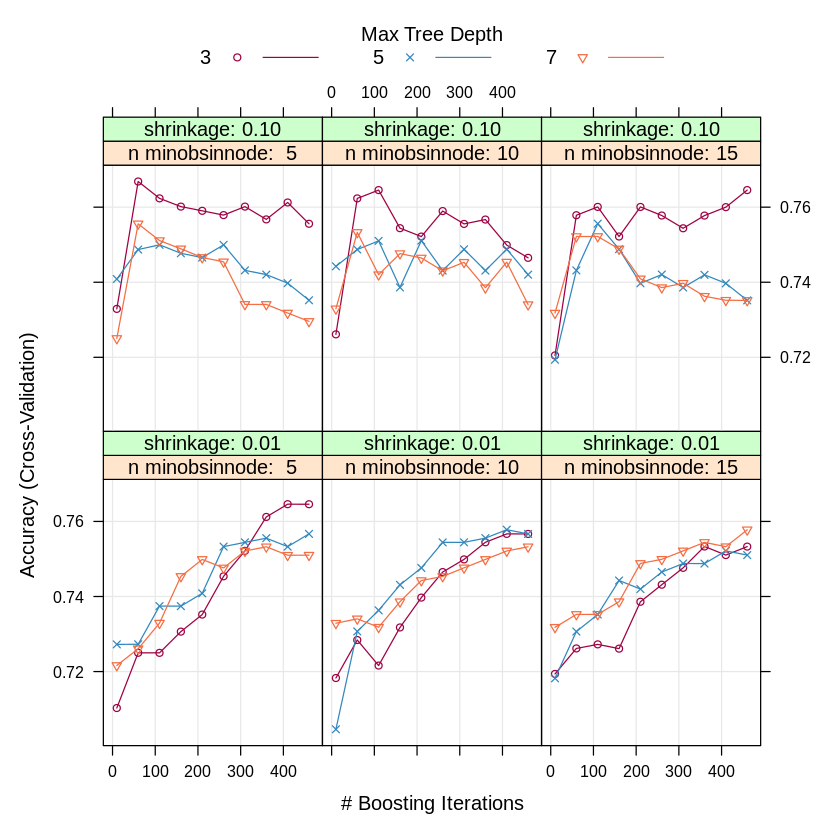

In [ ]:
plot(GBMtune)
#GBMtune$results
GBMtune$bestTune


#plotting accuracy
trellis.par.set(caretTheme())
plot(GBMtune, metric = "Accuracy")


[1] 0.2047511

[1] 0.208

,var,rel.inf
,<chr>,<dbl>
family_historyYes,family_historyYes,23.0831690
work_interfereSometimes,work_interfereSometimes,14.1682474
work_interfereOften,work_interfereOften,10.6053576
benefitsYes,benefitsYes,7.4432856
work_interfereRarely,work_interfereRarely,7.1097104
Age,Age,5.8638075
GenderMale,GenderMale,3.4960604
obs_consequenceYes,obs_consequenceYes,3.3644719
self_employedYes,self_employedYes,3.0261206


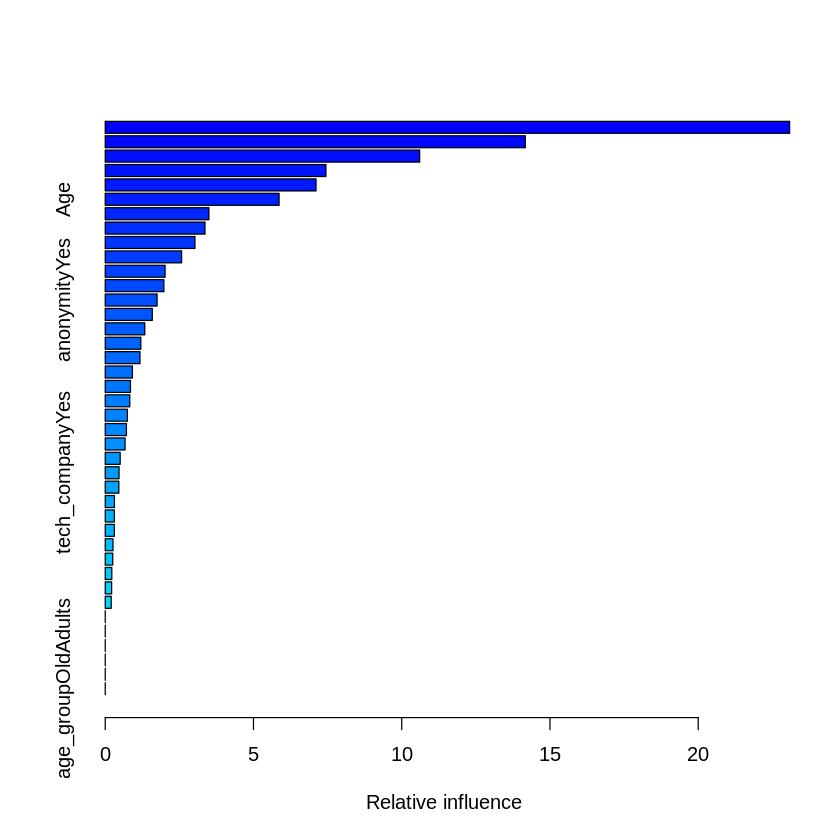

In [ ]:

##prediction on train data using tuned model 
GBMbesttrain <- predict(GBMtune, newdata=dftrain)
#print(GBMbest,5)

##train error
train_error_GBMbest <- mean((GBMbesttrain != y1)^2)
train_error_GBMbest


##prediction on testt data using tuned model 
GBMbesttest <- predict(GBMtune, newdata=dftest)

##test error
test_error_GBMbest <- mean((GBMbesttest != y2)^2)
test_error_GBMbest


## Model Inspection 
## Find the estimated optimal number of iterations
#perf_GBMbest  = gbm.perf(GBMtune, method="cv") 
#perf_GBMbest

## summary model
## Which variances are important
summary(GBMtune)


### **KNN**

In [ ]:
dftrain <- subset(train_data, select=-c(state, Country)) 
dftest <- subset(test_data, select=-c(state, Country))


dftrain$treatment<-ifelse(dftrain$treatment=="Yes",1,0)
dftest$treatment<-ifelse(dftest$treatment=="Yes",1,0)

dftrain$treatment=as.factor(dftrain$treatment)
dftest$treatment=as.factor(dftest$treatment)
#dftrain$treatment
#dftest$treatment

In [ ]:

# Setting up train controls
repeats = 3
numbers = 10
tunel = 10

set.seed(1234)
x = trainControl(method = "repeatedcv",
                 number = 2,
                 repeats = 2,
                 classProbs =   TRUE)
                 #summaryFunction = twoClassSummary)

dftrain$treatment <- factor(dftrain$treatment, 
                  levels = c(0, 1), 
                  labels = c("No","Yes"))

dftest$treatment <- factor(dftest$treatment, 
                  levels = c(0, 1), 
                  labels = c("No","Yes"))


model1 <- train(treatment~. , data = dftrain, method = "knn",
               preProcess = c("center","scale"),
               trControl = x,
               metric = "ROC",
               tuneLength = tunel)

# Summary of model
model1

Warning message in train.default(x, y, weights = w, ...):
“The metric "ROC" was not in the result set. Accuracy will be used instead.”


k-Nearest Neighbors 

884 samples
 23 predictor
  2 classes: 'No', 'Yes' 

Pre-processing: centered (40), scaled (40) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 442, 442, 441, 443 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6640429  0.3292240
   7  0.6747870  0.3508269
   9  0.6759106  0.3531754
  11  0.6809908  0.3634495
  13  0.6951171  0.3918922
  15  0.6821144  0.3659287
  17  0.6855157  0.3728728
  19  0.6900432  0.3819477
  21  0.6900393  0.3820123
  23  0.7041771  0.4102166

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 23.

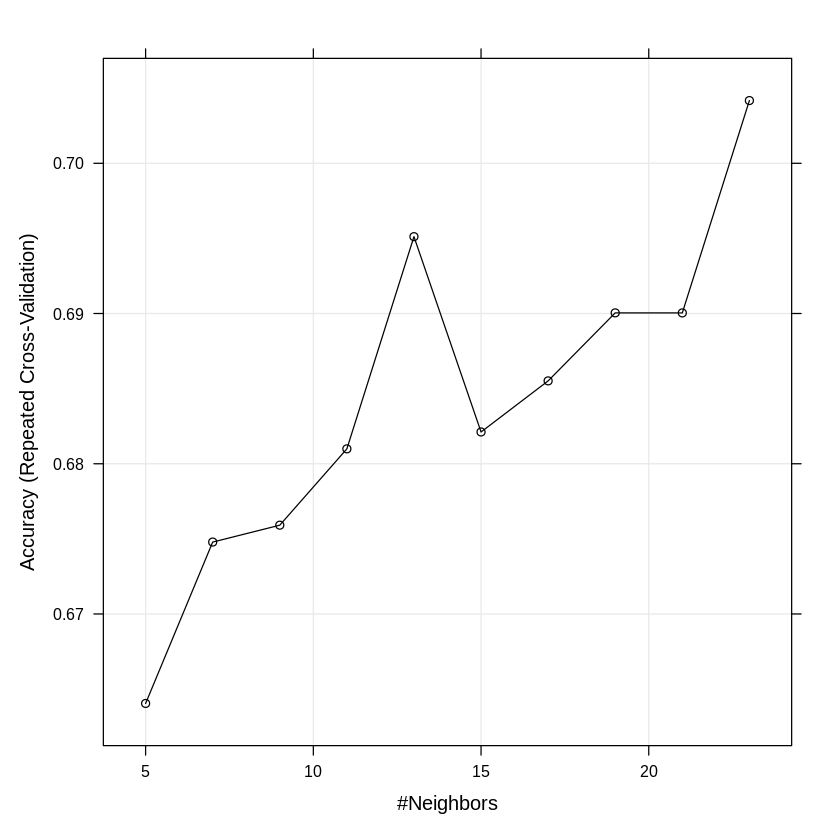

In [ ]:
plot(model1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




[1] "AUC for prediction on training data is 0.512156"

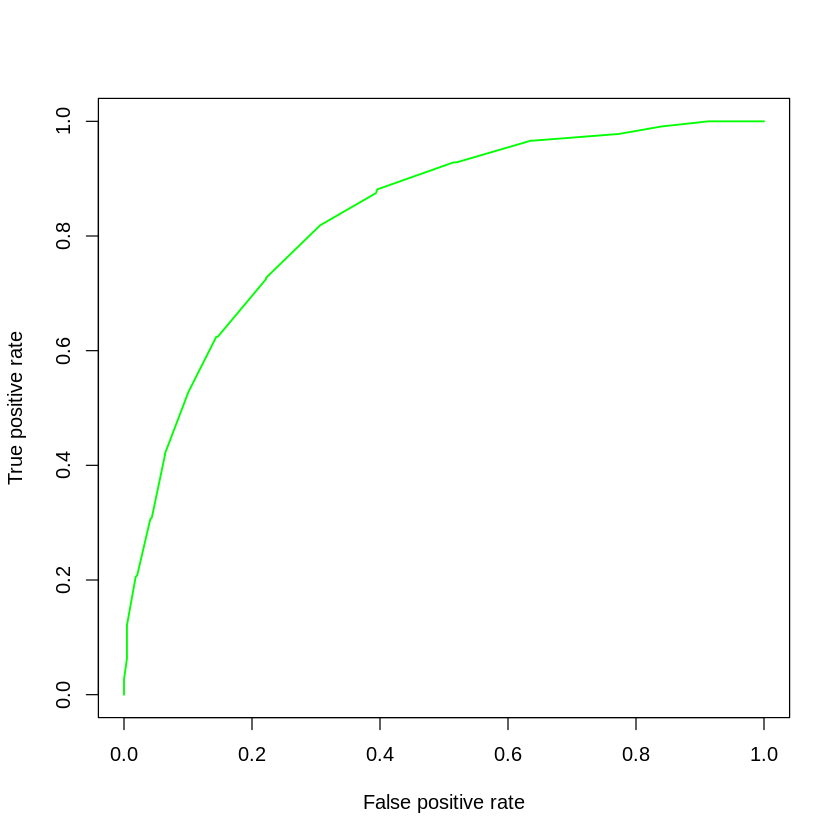

In [ ]:
# prediciton on train data
train_pred <- predict(model1, dftrain, type = "prob")
#train_pred

install.packages("ROCR")
library(ROCR)
pred_train <-prediction(train_pred[,2],dftrain$treatment)

# Plot AUC
perf_val_train <- performance(pred_train, "tpr", "fpr")
plot(perf_val_train, col = "green", lwd = 1.5)

#Calculating KS statistics
AUC_train <- max(attr(perf_val_train, "y.values")[[1]] - (attr(perf_val_train, "x.values")[[1]]))

sprintf("AUC for prediction on training data is %f", AUC_train)



[1] "AUC for prediction on training data is 0.427881"

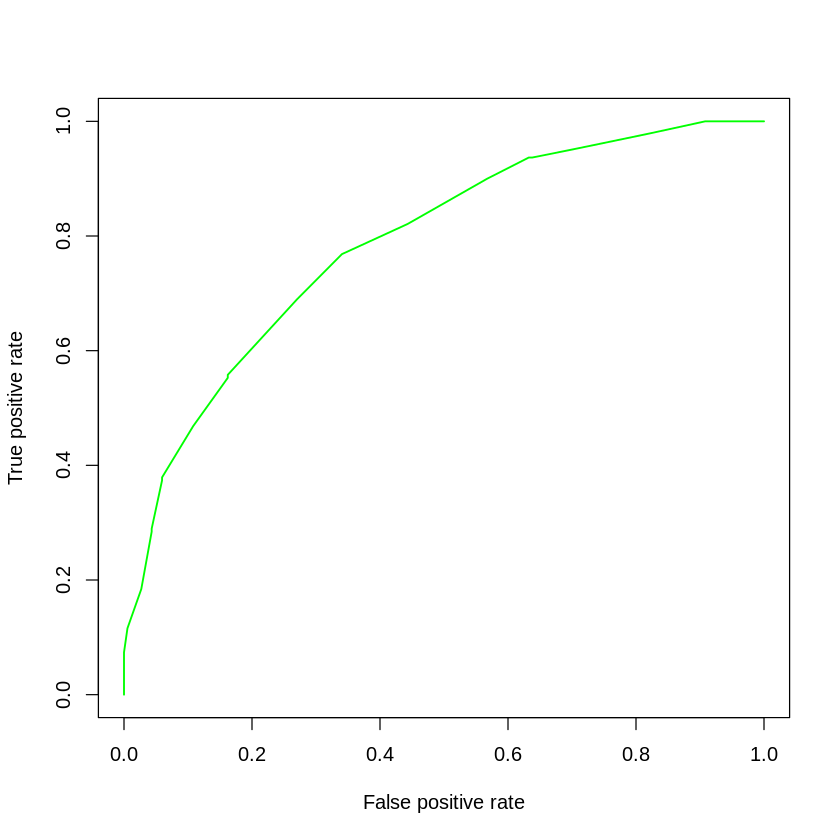

In [ ]:
# prediciton on test data
test_pred <- predict(model1,dftest, type = "prob")
#test_pred

#Storing Model Performance Scores
#install.packages("ROCR")
library(ROCR)
pred_test <-prediction(test_pred[,2],dftest$treatment)
#pred_test

# Plot AUC
perf_val_test <- performance(pred_test, "tpr", "fpr")
plot(perf_val_test, col = "green", lwd = 1.5)

#Calculating KS statistics
AUC_test <- max(attr(perf_val_test, "y.values")[[1]] - (attr(perf_val_test, "x.values")[[1]]))
sprintf("AUC for prediction on testing data is %f", AUC_test)


In [ ]:

##prediction on train data using tuned model 
KNNbesttrain <- predict(model1, newdata=dftrain)
#KNNbesttrain
#dftrain$treatment
##train error
train_error_KNNbest <- mean((KNNbesttrain != dftrain$treatment)^2)

sprintf("Training error for tuned KNN model is %f", train_error_KNNbest)

[1] "Training error for tuned KNN model is 0.261312"

In [ ]:
##prediction on test data using tuned model 
KNNbesttest <- predict(model1, newdata=dftest)

##test error
test_error_KNNbest <- mean((KNNbesttest != dftest$treatment)^2)


sprintf("Testing error for tuned KNN model is %f", test_error_KNNbest)

[1] "Testing error for tuned KNN model is 0.306667"

# Research Question #3 - Does a company that support/provide mental health benefit leads to more employee seeking treatment for mental health conditions?

In [ ]:
# ls(train_data)

train_q3 <- train_data[,c("anonymity", "benefits", "leave", "mental_health_consequence", "care_options", "coworkers", "mental_vs_physical", "obs_consequence", "seek_help", "supervisor", "treatment", "wellness_program")]
test_q3 <- test_data[,c("anonymity", "benefits", "leave", "mental_health_consequence", "care_options", "coworkers", "mental_vs_physical", "obs_consequence", "seek_help", "supervisor", "treatment", "wellness_program")]


logit_q3 <- glm(treatment ~ ., data = train_q3, family = binomial)
summary(logit_q3)

#head(train_q3)

#train accuracy
pred <- (predict.glm(logit_q3, train_q3,type = 'response') >= 0.5)*1
mean(pred == ((train_q3$treatment == 'Yes')*1))

#test accuracy
pred <- (predict.glm(logit_q3, test_q3,type = 'response') >= 0.5)*1
mean(pred == ((test_q3$treatment == 'Yes')*1))



Call:
glm(formula = treatment ~ ., family = binomial, data = train_q3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3476  -1.0082   0.3868   1.0025   2.1041  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -1.0223     0.3000  -3.407 0.000656 ***
anonymityYes                   0.7717     0.1908   4.045 5.24e-05 ***
benefitsNo                     0.1397     0.1930   0.724 0.469211    
benefitsYes                    0.9700     0.2149   4.514 6.36e-06 ***
leaveSomewhat easy            -0.7375     0.2314  -3.188 0.001434 ** 
leaveVery difficult            0.3291     0.2753   1.195 0.231926    
leaveVery easy                -0.7297     0.2514  -2.902 0.003704 ** 
mental_health_consequenceNo   -0.6579     0.1969  -3.342 0.000833 ***
mental_health_consequenceYes   0.4706     0.2293   2.053 0.040115 *  
care_optionsYes                0.4692     0.1680   2.793 0.005215 ** 
coworkersSome of them        

[1] 0.6730769

[1] 0.64

In [ ]:
# Set up cross-validation
set.seed(123) # For reproducibility
cv_folds <- 10 # Number of k-folds

# Create a train control object to specify the cross-validation method
train_control <- trainControl(method = "cv", number = cv_folds)

# Fit the logistic regression model with cross-validation
cv_model <- train(treatment ~ .,
                   data = train_q3, # Replace 'dataset' with the name of your dataset
                   method = "glm",
                   family = "binomial",
                   trControl = train_control)

# Print the cross-validation results
print(cv_model)

Generalized Linear Model 

884 samples
 11 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 795, 795, 795, 797, 795, 797, ... 
Resampling results:

  Accuracy  Kappa    
  0.649512  0.2994371



**Random Forest**

,MeanDecreaseAccuracy
anonymity,15.045280
benefits,26.981503
leave,12.127067
mental_health_consequence,13.342364
care_options,15.439460
coworkers,14.359933
mental_vs_physical,1.850577
obs_consequence,11.586057
seek_help,9.755351
supervisor,1.949907


,MeanDecreaseGini
anonymity,16.92270
benefits,38.54257
leave,38.83784
mental_health_consequence,28.54161
care_options,18.91561
coworkers,28.56108
mental_vs_physical,14.55362
obs_consequence,14.19180
seek_help,14.81453
supervisor,25.56121


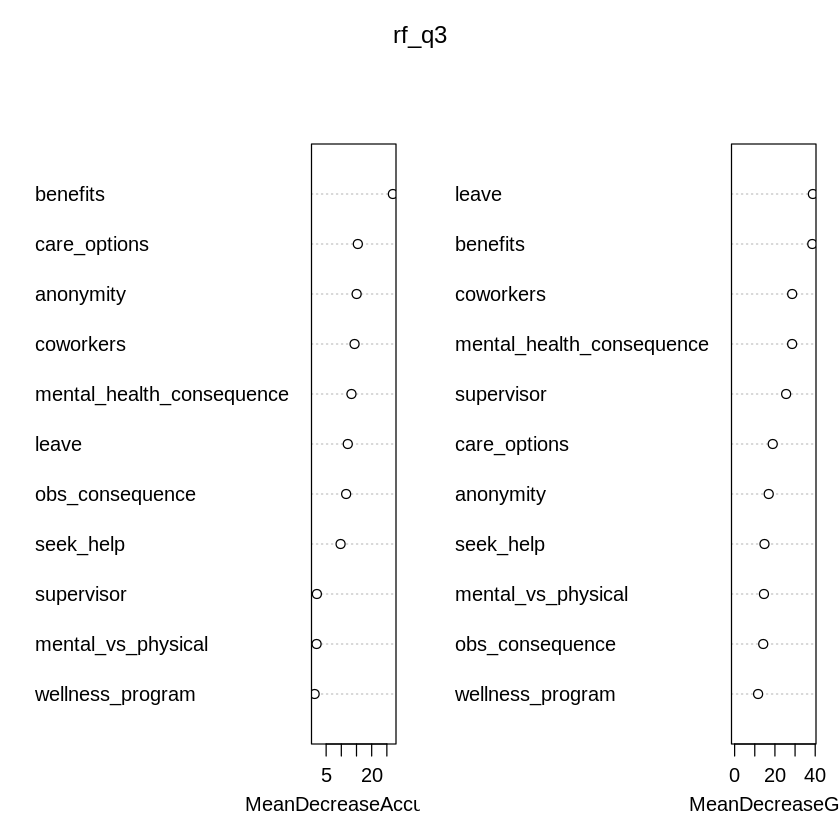

In [ ]:
# random forest
rf_q3 <- randomForest(as.factor(treatment) ~ . , data=train_q3, importance=TRUE)
importance(rf_q3, type=1)

importance(rf_q3, type=2)
varImpPlot(rf_q3)


In [ ]:
## Prediction on the training data set
rf_pred_train_q3 = predict(rf_q3, train_q3, type='class')
table(rf_pred_train_q3, train_q3$treatment)
mean(rf_pred_train_q3 == train_q3$treatment) 

                
rf_pred_train_q3  No Yes
             No  372  62
             Yes  65 385

[1] 0.8563348

In [ ]:
## Prediction on the testing data set
rf_pred_test_q3 = predict(rf_q3, test_q3, type='class')
table(rf_pred_test_q3, test_q3$treatment)
mean(rf_pred_test_q3 == test_q3$treatment) 

               
rf_pred_test_q3  No Yes
            No  112  64
            Yes  73 126

[1] 0.6346667

In [ ]:
anova(logit_q3, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,883,1225.371,NA
anonymity,1,22.5584371,882,1202.813,2.038473e-06
benefits,2,35.6258565,880,1167.187,1.836300e-08
leave,3,37.7509286,877,1129.436,3.191335e-08
mental_health_consequence,2,12.7237295,875,1116.712,1.726145e-03
care_options,1,4.7513964,874,1111.961,2.927453e-02
coworkers,2,23.6951819,872,1088.266,7.155774e-06
mental_vs_physical,1,1.2667707,871,1086.999,2.603734e-01
obs_consequence,1,7.6158762,870,1079.383,5.785664e-03


# Research Question #4 - Which type of companies, if any, are more likely to see negative consequences for employees with mental health conditions?

In [ ]:
# df subset with response variable obs_consequence and predictor variables (company characteristics)
train_Q4 <- train_data[,c("obs_consequence", "self_employed", "no_employees", "remote_work", "tech_company")]
test_Q4 <- test_data[,c("obs_consequence", "self_employed", "no_employees", "remote_work", "tech_company")]


[1] "Selected No. of Vars: 2"

Variables,Accuracy,Kappa,AccuracySD,KappaSD
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.8529367,0.000000000,0.0008571465,0.00000000
3,0.8529367,0.000000000,0.0008571465,0.00000000
4,0.8518131,-0.002131148,0.0032973765,0.00673928


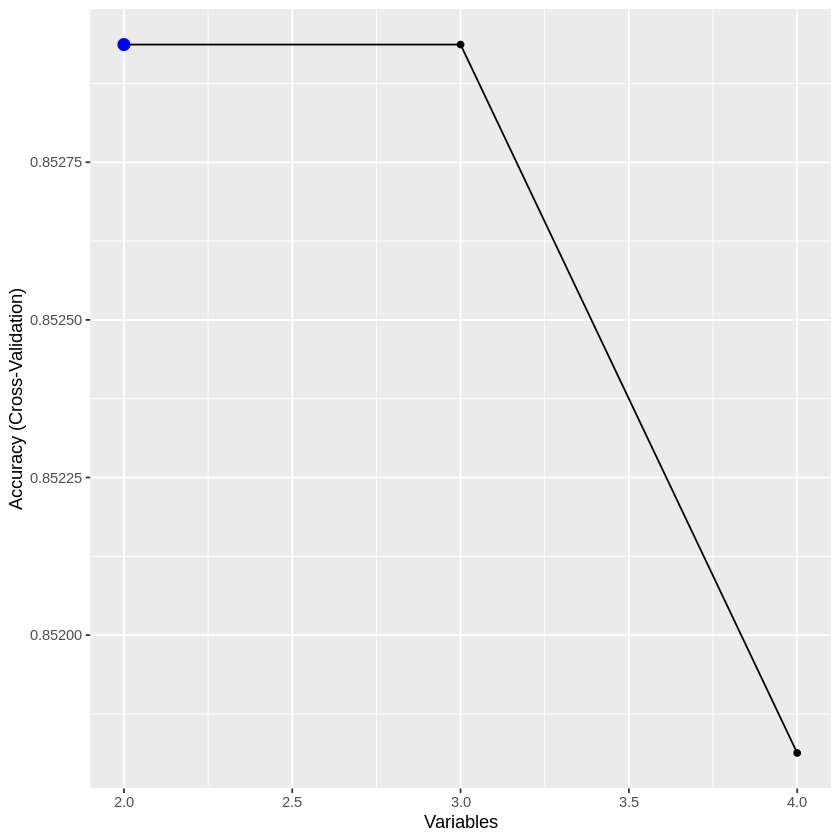

In [ ]:
# random forest for feature importance/selection
set.seed(1)
control <- rfeControl(functions = rfFuncs,
            method = "cv", 
            number = 10)

rf <- rfe(x = subset(train_Q4, select = -c(obs_consequence)),
          y = train_Q4$obs_consequence,
          sizes = c(2:4),
          rfeControl = control)

ggplot(data = rf, metric = "Accuracy")
sprintf('Selected No. of Vars: %s', rf$bestSubset)
rf$results

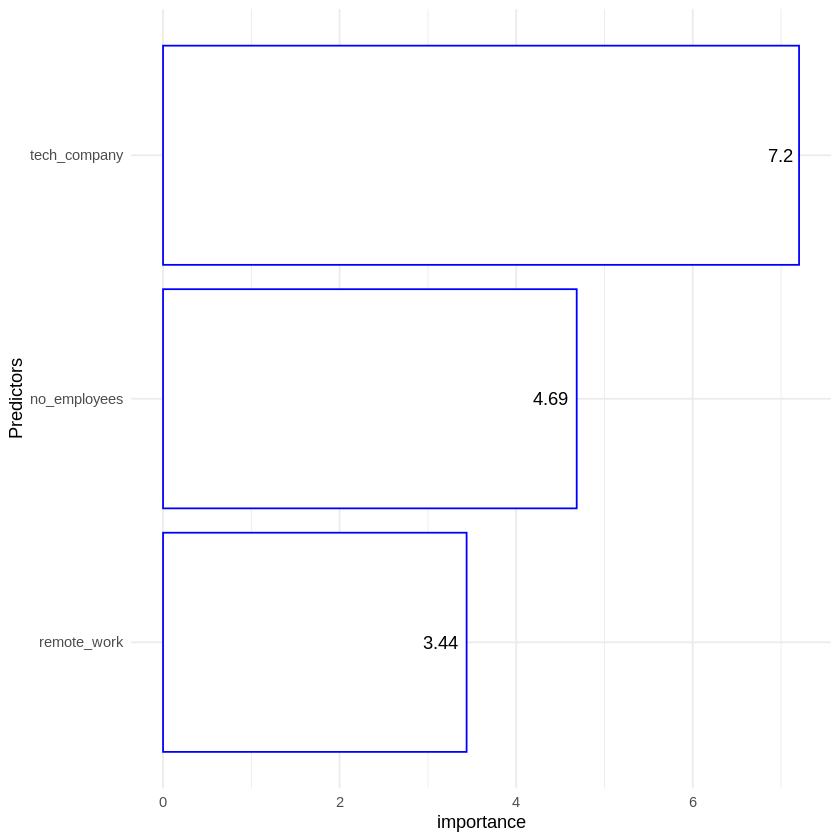

In [ ]:
set.seed(1)
importance <- varImp(rf, value='gcv')
predictors <- row.names(importance)
importance <- importance[,1]

ggplot(data = varImp(rf), aes(x = reorder(predictors, importance), y = importance)) + 
  geom_bar(stat = "identity", color="blue", fill="white") + 
  geom_text(aes(label=round(importance,2), hjust = 1.25)) +
  theme_minimal() +
  xlab('Predictors') +
  coord_flip()

In [ ]:
# logistic regression
logit_q4 <- glm(obs_consequence ~  tech_company + no_employees + remote_work, data=train_Q4, family='binomial')
summary(logit_q4)


Call:
glm(formula = obs_consequence ~ tech_company + no_employees + 
    remote_work, family = "binomial", data = train_Q4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8760  -0.5979  -0.5097  -0.4262   2.2426  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)  
(Intercept)                 -0.7601     0.3338  -2.277   0.0228 *
tech_companyYes             -0.4941     0.2357  -2.096   0.0361 *
no_employees100-500         -0.4490     0.3478  -1.291   0.1966  
no_employees26-100          -0.7212     0.3283  -2.197   0.0280 *
no_employees500-1000        -0.8075     0.5419  -1.490   0.1362  
no_employees6-25            -0.7984     0.3324  -2.402   0.0163 *
no_employeesMore than 1000  -0.3767     0.3194  -1.179   0.2383  
remote_workYes              -0.3777     0.2332  -1.619   0.1054  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 738.27 

In [ ]:
# GOF test - high p-value = model is a good fit
sprintf('Deviance residuals: %s;  GOF p-value: %s', logit_q4$deviance, 1 - pchisq(logit_q4$deviance,logit_q4$df.residual))

# Overall model is statistically significant w. p-value < 0.05
sprintf('p-value for overall model significance: %s ', 1 - pchisq(logit_q4$null.deviance - logit_q4$deviance,logit_q4$df.null - logit_q4$df.residual))

[1] "Deviance residuals: 722.794431669099;  GOF p-value: 0.999948254035295"

[1] "p-value for overall model significance: 0.0303703152365562 "

In [ ]:
#train accuracy
pred <- (predict.glm(logit_q4, train_Q4,type = 'response') >= 0.5)*1
mean(pred == ((train_Q4$obs_consequence == 'Yes')*1))

#test accuracy
pred <- (predict.glm(logit_q4, test_Q4,type = 'response') >= 0.5)*1
mean(pred == ((test_Q4$obs_consequence == 'Yes')*1))


[1] 0.8529412

[1] 0.856